<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Pre-analysis-pipeline" data-toc-modified-id="Pre-analysis-pipeline-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Pre-analysis pipeline</a></span><ul class="toc-item"><li><span><a href="#pipeline-for-1-animal" data-toc-modified-id="pipeline-for-1-animal-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>pipeline for 1 animal</a></span><ul class="toc-item"><li><span><a href="#Bidirectional-correction-for-resonant-scan" data-toc-modified-id="Bidirectional-correction-for-resonant-scan-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Bidirectional correction for resonant scan</a></span></li><li><span><a href="#Motion-correction" data-toc-modified-id="Motion-correction-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Motion correction</a></span></li><li><span><a href="#Analyze-motion-correction-(not-done-yet)" data-toc-modified-id="Analyze-motion-correction-(not-done-yet)-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Analyze motion correction (not done yet)</a></span></li><li><span><a href="#Create-video-to-check-motion" data-toc-modified-id="Create-video-to-check-motion-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Create video to check motion</a></span></li><li><span><a href="#Extract-signals" data-toc-modified-id="Extract-signals-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>Extract signals</a></span></li><li><span><a href="#Neuropil-correction-(haven't-used-it-well-yet)" data-toc-modified-id="Neuropil-correction-(haven't-used-it-well-yet)-1.1.6"><span class="toc-item-num">1.1.6&nbsp;&nbsp;</span>Neuropil correction (haven't used it well yet)</a></span></li></ul></li></ul></li><li><span><a href="#Analysis-pipeline-(KI)" data-toc-modified-id="Analysis-pipeline-(KI)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analysis pipeline (KI)</a></span><ul class="toc-item"><li><span><a href="#pipeline-for-1-animal" data-toc-modified-id="pipeline-for-1-animal-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>pipeline for 1 animal</a></span></li><li><span><a href="#Low-pass-filtering" data-toc-modified-id="Low-pass-filtering-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Low pass filtering</a></span></li><li><span><a href="#pipeline-for-two-solenoid-experiments" data-toc-modified-id="pipeline-for-two-solenoid-experiments-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>pipeline for two-solenoid experiments</a></span></li><li><span><a href="#compare-two-states" data-toc-modified-id="compare-two-states-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>compare two states</a></span></li><li><span><a href="#pipeline-for-odor-stimulation-experiment" data-toc-modified-id="pipeline-for-odor-stimulation-experiment-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>pipeline for odor stimulation experiment</a></span></li><li><span><a href="#Spontanaous-activity" data-toc-modified-id="Spontanaous-activity-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Spontanaous activity</a></span></li><li><span><a href="#Loop-for-all-condition" data-toc-modified-id="Loop-for-all-condition-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Loop for all condition</a></span></li></ul></li><li><span><a href="#Summarize-data-for-multiple-stimuli" data-toc-modified-id="Summarize-data-for-multiple-stimuli-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Summarize data for multiple stimuli</a></span><ul class="toc-item"><li><span><a href="#Define-parameters-for-summary-plots" data-toc-modified-id="Define-parameters-for-summary-plots-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Define parameters for summary plots</a></span></li><li><span><a href="#Create-result-dictionary" data-toc-modified-id="Create-result-dictionary-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Create result dictionary</a></span></li><li><span><a href="#Create-plots" data-toc-modified-id="Create-plots-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Create plots</a></span></li></ul></li><li><span><a href="#Summarize-data-for-low/high-estrogen" data-toc-modified-id="Summarize-data-for-low/high-estrogen-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Summarize data for low/high estrogen</a></span><ul class="toc-item"><li><span><a href="#Define-parameters-for-summary-plots" data-toc-modified-id="Define-parameters-for-summary-plots-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Define parameters for summary plots</a></span></li><li><span><a href="#Create-result-dictionary" data-toc-modified-id="Create-result-dictionary-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Create result dictionary</a></span></li><li><span><a href="#Create-plots" data-toc-modified-id="Create-plots-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Create plots</a></span></li></ul></li><li><span><a href="#VJ-analysis-code-(works),-come-back-when-necessary" data-toc-modified-id="VJ-analysis-code-(works),-come-back-when-necessary-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>VJ analysis code (works), come back when necessary</a></span></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

import scipy.io as sio
import os
import subprocess
import bisect
import errno
import time
import pandas
import pickle
import num2word
from sklearn.decomposition import PCA
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score
#from sklearn import cross_validation
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, silhouette_score, adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering, SpectralClustering, KMeans
import scipy.stats as stats
from sklearn.metrics import roc_auc_score as auROC
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import (ModelDesc, EvalEnvironment, Term, EvalFactor, LookupFactor, dmatrices, INTERCEPT)
from statsmodels.distributions.empirical_distribution import ECDF
from shapely.geometry import MultiPolygon, Polygon, Point
import PIL
from itertools import product
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.colorbar as colorbar
from sima.ROI import poly2mask, _reformat_polygons, ROIList
import h5py
import sima
import sys
import seaborn as sns

from PIL import Image
import tifffile

# import all the functions from a python file
module_path = os.path.abspath(r'C:\Users\Stuber_Lab\Google Drive\2pImaging\python code')
if module_path not in sys.path:
    sys.path.append(module_path)
from VJ_package_v5 import *
import bidi_offset_correction as boc
import neuropil_correction as npc

sns.set_style('ticks')
import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['legend.labelspacing'] = 0.2
mpl.rcParams['axes.labelpad'] = 2
mpl.rcParams['xtick.major.size'] = 2
mpl.rcParams['xtick.major.width'] = 0.5
mpl.rcParams['xtick.major.pad'] = 1
mpl.rcParams['ytick.major.size'] = 2
mpl.rcParams['ytick.major.width'] = 0.5
mpl.rcParams['ytick.major.pad'] = 1
mpl.rcParams['lines.scale_dashes'] = False
mpl.rcParams['lines.dashed_pattern'] = (2, 1)
mpl.rcParams['font.sans-serif'] = ['Helvetica LT Std']
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['text.color'] = 'k'

def calculate_centraltendency_for_rois_KI(signal, baseline_frame, centraltendency='auROC'):
    #signal has shape numtrials x numtimepoints x numrois
    #auROCmat has shape numrois x numtimepoints
    
    if centraltendency=='auROC':
        baseline = signal[:,:,0:baseline_frame]
        signal = signal[np.isfinite(baseline[:,0]),:,:]
        baseline = baseline[np.isfinite(baseline[:,0]),:]
        (numtrials, numtimepoints, numrois) = signal.shape
#         print baseline.shape
        #print np.mean(baseline)
        auROCmat = np.nan*np.ones((numrois, numtimepoints))
        for roi in range(numrois):
            #print roi
            for t in range(numtimepoints):
                temp = signal[:,t,roi]#; temp = temp[np.isfinite(temp)]
#                 print temp.shape, roi, t
#                 print temp
                data = np.concatenate((baseline[np.isfinite(temp),roi], temp[np.isfinite(temp)]))
                labels = np.concatenate((np.zeros((np.sum(np.isfinite(temp)),)), np.ones((np.sum(np.isfinite(temp)),))))
                auROCmat[roi,t] = 2*auROC(labels, data)-1
            #print roi, np.mean(auROCmat[roi,:])
        #print np.mean(auROCmat[:,baseline_epoch[0]:baseline_epoch[1]])
        #raise Exception()
        return auROCmat
    elif centraltendency=='baseline subtracted mean':
        return np.nanmean(signal, axis=0)

def plot_rasters_PSTH_KI(rois_of_interest, keys_withtrials, result_dict,alignment_key,data_key,
                  after_frames, before_frames, framerate,
                  colors_for_key, indir, ylabel, savedir, rasters=True, PSTH=True, sortby=None):
    if not os.path.exists(savedir):
        os.mkdir(savedir)
#     if len(signal_array[keys_withtrials[0]].shape)<3:
    if 'None' in keys_withtrials:
        keys_withtrials.remove('None')

    if 'lick' in alignment_key:
        xlabel = 'Time from first lick (s)'
    elif 'solenoid' in alignment_key:
        xlabel = 'Time from stimulation (s)'
    elif "vacuum" in alignment_key:
        xlabel = 'Time from vacuum (s)'
    if rois_of_interest is None:
        lick_plot = True
        cmap='gray_r'
        rois_of_interest = [0]
    else:
        lick_plot = False
        cmap = 'coolwarm'
    for roi in rois_of_interest:
        cmin = np.nan*np.ones((len(keys_withtrials),))
        cmax = np.nan*np.ones((len(keys_withtrials),))
        if rasters and PSTH:
            fig, axs = plt.subplots(len(keys_withtrials)+1, figsize=(5,3*(len(keys_withtrials)+1)))
        elif PSTH:
            fig, axs = plt.subplots(1, figsize=(5,3))
        for k, key in enumerate(keys_withtrials):
            if rasters:
                if sortby is None:
                    if lick_plot:
                        sns.heatmap(result_dict[alignment_key][key][data_key][:,:], ax=axs[k], linewidth=0,
                                    cmap=plt.get_cmap(cmap))
                    else:
                        sns.heatmap(result_dict[alignment_key][key][data_key][:,roi,:], ax=axs[k], linewidth=0,
                                    cmap=plt.get_cmap(cmap))
                else:
                    if lick_plot:
                        sns.heatmap(result_dict[alignment_key][key][data_key][sortby[key],:], ax=axs[k], linewidth=0,
                                    cmap=plt.get_cmap(cmap))
                    else:
                        sns.heatmap(result_dict[alignment_key][key][data_key][sortby[key],roi,:], ax=axs[k], linewidth=0,
                                cmap=plt.get_cmap(cmap))
                    
                axs[k].set_title('%s trials'%key)
                axs[k].set_ylabel('Trial number')
                axs[k].set_xlabel(xlabel)
                axs[k].set_xticks(range(0, (before_frames+after_frames+int(5*framerate)), int(5*framerate)))
                axs[k].set_xticklabels([str(((a-before_frames)/framerate)) for a in range(0, (before_frames+after_frames+int(5*framerate)), int(5*framerate))])
                axs[k].set_yticks(range(0, result_dict[alignment_key][key][data_key].shape[0], 10))
                axs[k].set_yticklabels([str(a+1) for a in range(0, result_dict[alignment_key][key][data_key].shape[0], 10)])
                axs[k].plot([before_frames,before_frames],
                            [0, result_dict[alignment_key][key][data_key].shape[0]], '--k', linewidth=1)
                
            if PSTH:
                if not rasters:
                    ax = axs
                else:
                    ax = axs[-1]
                if lick_plot:
                    sns.tsplot(result_dict[alignment_key][key][data_key][:,:],
                           ax=ax, estimator=np.nanmean, color=colors_for_key[key], condition=key)
                else:
                    sns.tsplot(result_dict[alignment_key][key][data_key][:,roi,:],
                           ax=ax, estimator=np.nanmean, color=colors_for_key[key], condition=key)
            if lick_plot:
                temp = np.nanmean(result_dict[alignment_key][key][data_key][:,:], axis=0)
            else:
                temp = np.nanmean(result_dict[alignment_key][key][data_key][:,roi,:], axis=0)

            cmin[k] = np.amin(temp[np.isfinite(temp)])
            cmax[k] = np.amax(temp[np.isfinite(temp)])
        if PSTH:
            if not rasters:
                ax = axs
            else:
                ax = axs[-1]
            ax.set_xticks(range(0, (before_frames+after_frames+int(5*framerate)), int(5*framerate)))
            ax.set_xticklabels([str(((a-before_frames)/framerate)) for a in range(0, (before_frames+after_frames+int(5*framerate)), int(5*framerate))])

            ax.plot([before_frames,before_frames], 
                     [np.amin(cmin)-0.1,
                      np.amax(cmax)+0.1],
                     '--k', linewidth=1)  
            '''ax.plot([pre_window_size+numframesforcue, pre_window_size+numframesforcue],
                     [np.amin(cmin)-0.1,
                      np.amax(cmax)+0.1],
                     '--y', linewidth=1)'''
            ax.set_xlabel(xlabel)
            ax.set_ylabel(ylabel)
            ax.legend(loc='upper right') 
        fig.tight_layout()
        if len(rois_of_interest)==1:
            fig.savefig(os.path.join(savedir, 'PSTH_%s.png'%(ylabel.replace('\n', ' '))+ '_' + alignment_key+'_' + data_key+'.png'), format='png', dpi=300)
            fig.savefig(os.path.join(savedir, 'PSTH_%s.pdf'%(ylabel.replace('\n', ' '))+ '_' + alignment_key+'_' + data_key+'.pdf'), format='pdf')
        else:
            fig.savefig(os.path.join(savedir, 'ROI%d_PSTH_%s.png'%(roi+1, ylabel.replace('\n', ' '))+ '_' + alignment_key+'_' + data_key+'.png'), format='png', dpi=300)
            fig.clf()

# normalizes the signal which is in a 3d structure (trial,roi,signal)
def normalize_signal_3d(signals,before_frames):
    if len(signals) == 0:
        signals_norm = []
        return signals_norm
    else:
        signalsmedian = np.median(signals[:,:,0:before_frames],axis = 2)
        signalsmin = np.amin(signals[:,:,0:before_frames],axis = 2)
        signalsmax = np.amax(signals[:,:,0:before_frames],axis = 2)
        signals_norm = (signals-signalsmedian[:,:,None])/(signalsmax-signalsmin)[:,:,None]
        return signals_norm


def mean_signal_3d(signals,before_frames):
    signalsmean = np.mean(signals[:,:,0:before_frames],axis = 2)
    signals_norm = signals-signalsmean[:,:,None]
    return signals_norm


# normalizes the signal which is in a 3d structure (trial,roi,signal)
def normalize_signal_3d(signals,before_frames):
    if len(signals) == 0:
        signals_norm = []
        return signals_norm
    else:
        signalsmedian = np.median(signals[:,:,0:before_frames],axis = 2)
        signalsmin = np.amin(signals[:,:,0:before_frames],axis = 2)
        signalsmax = np.amax(signals[:,:,0:before_frames],axis = 2)
        signals_norm = (signals-np.expand_dims(signalsmedian,axis = 2))/np.expand_dims((signalsmax-signalsmin),axis = 2)
        return signals_norm


def mean_signal_3d(signals,before_frames):
    signalsmean = np.mean(signals[:,:,0:before_frames],axis = 2)
    signals_norm = signals-np.expand_dims(signalsmean,axis = 2)
    return signals_norm

def append_dict(summary_result_dict,temp_result_dict,key,type_state,signal = 'signal_norm',duplicate = False):

    #print len(temp_result_dict['solenoid_align'].keys())
    if len(temp_result_dict['solenoid_align'].keys()) == 2:
        alignment = 'lick_align'
    elif len(temp_result_dict['solenoid_align'].keys()) == 4:
        alignment = 'solenoid_align'
    #print alignment
    if len(temp_result_dict[alignment][key][signal]) == 0:
        return summary_result_dict
    elif temp_result_dict[alignment][key][signal].shape[0] < 30:
        print temp_result_dict[alignment][key][signal].shape
        nans= np.zeros((30-temp_result_dict[alignment][key][signal].shape[0],temp_result_dict[alignment][key][signal].shape[1],temp_result_dict[alignment][key][signal].shape[2]))
        nans[:] = np.nan
        temp_result_dict[alignment][key][signal] = np.append(temp_result_dict[alignment][key][signal],nans,axis = 0)
        if len(summary_result_dict.keys()) == 0:
            summary_result_dict[type_state][key] = temp_result_dict[alignment][key][signal]
        #to merge duplicate trials
        elif any([k == key for k in summary_result_dict[type_state].keys()]) and duplicate:
            print "skip"
        #if to merge rois from differnt planes 
        elif (any([k == key for k in summary_result_dict[type_state].keys()])) and not duplicate:
            #print "yes"
            #print summary_result_dict[type_state][key].shape
            #print temp_result_dict[alignment][key][signal].shape
            summary_result_dict[type_state][key] = np.append(summary_result_dict[type_state][key],temp_result_dict[alignment][key][signal],axis = 1)
        else:
            summary_result_dict[type_state][key] = temp_result_dict[alignment][key][signal]
        return summary_result_dict
    elif temp_result_dict[alignment][key][signal].shape[0] > 30:
        temp_result_dict[alignment][key][signal] = temp_result_dict[alignment][key][signal][0:30,:,:]
        if len(summary_result_dict.keys()) == 0:
            summary_result_dict[type_state][key] = temp_result_dict[alignment][key][signal]
        #to merge duplicate trials
        elif any([k == key for k in summary_result_dict[type_state].keys()]) and duplicate:
            print "skip"

        #if to merge rois from differnt planes 
        elif (any([k == key for k in summary_result_dict[type_state].keys()])) and not duplicate:
            #print "yes"
            #print summary_result_dict[type_state][key].shape
            #print temp_result_dict[alignment][key][signal].shape
            summary_result_dict[type_state][key] = np.append(summary_result_dict[type_state][key],temp_result_dict[alignment][key][signal],axis = 1)
        else:
            summary_result_dict[type_state][key] = temp_result_dict[alignment][key][signal]
        return summary_result_dict
    else:
        if len(summary_result_dict.keys()) == 0:
            summary_result_dict[type_state][key] = temp_result_dict[alignment][key][signal]
        #to merge duplicate trials
        elif any([k == key for k in summary_result_dict[type_state].keys()]) and duplicate:
            print "skip"

            
        #if to merge rois from differnt planes 
        elif (any([k == key for k in summary_result_dict[type_state].keys()])) and not duplicate:
            #print "yes"
            #print summary_result_dict[type_state][key].shape
            #print temp_result_dict[alignment][key][signal].shape
            summary_result_dict[type_state][key] = np.append(summary_result_dict[type_state][key],temp_result_dict[alignment][key][signal],axis = 1)
        else:
            summary_result_dict[type_state][key] = temp_result_dict[alignment][key][signal]
        return summary_result_dict

def calculate_centraltendency_for_rois_KI(signal, baseline_frame, centraltendency='auROC'):
    #signal has shape numtrials x numtimepoints x numrois
    #auROCmat has shape numrois x numtimepoints
    
    if centraltendency=='auROC':
        baseline = signal[:,:,0:baseline_frame]
        signal = signal[np.isfinite(baseline[:,0]),:,:]
        baseline = baseline[np.isfinite(baseline[:,0]),:]
        (numtrials, numtimepoints, numrois) = signal.shape
#         print baseline.shape
        #print np.mean(baseline)
        auROCmat = np.nan*np.ones((numrois, numtimepoints))
        for roi in range(numrois):
            #print roi
            for t in range(numtimepoints):
                temp = signal[:,t,roi]#; temp = temp[np.isfinite(temp)]
#                 print temp.shape, roi, t
#                 print temp
                data = np.concatenate((baseline[np.isfinite(temp),roi], temp[np.isfinite(temp)]))
                labels = np.concatenate((np.zeros((np.sum(np.isfinite(temp)),)), np.ones((np.sum(np.isfinite(temp)),))))
                auROCmat[roi,t] = 2*auROC(labels, data)-1
            #print roi, np.mean(auROCmat[roi,:])
        #print np.mean(auROCmat[:,baseline_epoch[0]:baseline_epoch[1]])
        #raise Exception()
        return auROCmat
    elif centraltendency=='baseline subtracted mean':
        return np.nanmean(signal, axis=0)

The bellow codes require processed 2p data

# Pre-analysis pipeline

This part contains bidirectional correction, motion correction, signal extraction.
Read the following code before anything.


UPDATE METADATA CSV FILE BEFORE RUNNING CODE

In [107]:
# load the data files
# set the directory 
all_root = r'C:\Users\Stuber_Lab\Google Drive\2pImaging'
animalname = 'm147'
rootdir = os.path.join(all_root,animalname)
twopdatadir = os.path.join(rootdir,'data','2p data')
behaviordir = os.path.join(rootdir,'data','behavior data')
projectedimgdir = os.path.join(rootdir,'data','projected imaging plane')
roidir = os.path.join(rootdir,'data','rois')
videodir = os.path.join(rootdir,'data','videos')
h5filedir = os.path.join(rootdir,'data','h5files')

#decide to use neuropil corrected or not
neuropil = 'y'     
min_neuropil_radius = 15
neuropil_radius = 50
beta_neuropil = 0.8 #'calculated'
normalization = 'mean'
signal_type = "signal_norm" #'signal_norm'  
analysis_condition = ''

if neuropil == 'y':
    type_signal = 'neuropil_corrected_signals'
else:
    type_signal = 'extractedsignals'

# create output directories
resultdir = os.path.join(rootdir,'data',type_signal + '_result_pickle')
figuredir = os.path.join(rootdir,'data',type_signal + '_figure')
summarydir = os.path.join(rootdir,'data',type_signal + '_summary')
spontaneousdir = os.path.join(rootdir,'data',type_signal + '_spontaneous')

for x in [resultdir,figuredir,summarydir,spontaneousdir]:
    if not os.path.exists(x):
        os.mkdir(x)

# collect meta info
metainfo = pd.read_csv(os.path.join(all_root,'meta','meta_info_all.csv'))


## pipeline for 1 animal

### Bidirectional correction for resonant scan

If there is a mismatch of odd and even rows in your image, run this code 

In [40]:
#set dataset
#collect a dataset with distortion

filename = 'KI_m150_d1_z605_1p1x'
basedir = os.path.join(rootdir,metainfo[metainfo.filename == filename].path.values[0])

#load image sequence.
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"
f = h5py.File(os.path.join(basedir,filename+'.h5'), 'r')
print(f['imaging'].shape)
#convert to a numpy array
img_seq = np.array(f['imaging'])


(10489, 512, 512)


In [ ]:
#run bidirectional error fixing code
my_bidi_corr_obj = boc.bidi_offset_correction(img_seq) # initialize data to object
my_bidi_corr_obj.compute_mean_image() # compute mean image across time
my_bidi_corr_obj.determine_bidi_offset() # calculated bidirectional offset via fft cross-correlation
data_corrected = my_bidi_corr_obj.correct_bidi_frames() # apply bidi offset to data

In [ ]:
# save the corrected data as h5 file
h = h5py.File(os.path.join(basedir,filename+'_shifted.h5'), 'w')
h.create_dataset('imaging', data=data_corrected)
h.close()


### Motion correction 

In [108]:
#set dataset
#collect a dataset with distortion

filename = 'KI_m147_d4_z475_1p1x'
basedir = os.path.join(rootdir,metainfo[metainfo.filename == filename].path.values[0])


In [115]:
#define max_displacement. This is critical for motion correction
max_displacement = [100,100]


In [116]:
datafile = os.path.join(basedir, '%s.h5'%filename)
sequences = [sima.Sequence.create('HDF5', datafile, 'tyx')]
mc_approach = sima.motion.HiddenMarkov2D(granularity='row', max_displacement=max_displacement, verbose=True)
# You may have to play with the above parameters for max_displacements

dataset = mc_approach.correct(sequences, os.path.join(basedir, filename + '_mc.sima'))
# dataset.export_frames([[[os.path.join(basedir, filename + '_mc.tif')]]], fmt='TIFF16')
dataset.export_averages([os.path.join(basedir, filename + str(max_displacement[0])+'_'+str(max_displacement[1])+'_mc_std.tif')], projection_type='std')

Estimating model parameters.
Estimating displacements for cycle  0


### Analyze motion correction (not done yet)

In [ ]:
mcDisp_approach = sima.motion.HiddenMarkov2D(granularity='row', max_displacement=max_displacement, n_processes = 1, verbose=True)
displacements = mc_approach.estimate(dataset)
# save the resulting displacement file
displacement_file = open( os.path.join(basedir, filename + '_mc.sima\\dataset.pkl'), "wb" )
pickle.dump( displacements, displacement_file )
displacement_file.close()

In [ ]:
# process and save np array of composite displacement
data_dims = displacements[0].shape
disp_np = np.squeeze( np.array(displacements[0]) )
disp_meanpix = np.mean( disp_np, axis=1 ) # avg across lines (y axis)

sima_disp = np.sqrt( np.square(disp_meanpix[:,0]) + np.square(disp_meanpix[:,1]) ) # calculate composite x + y offsets
np.save(basedir + '_mc.sima\\displacements_sima.npy', sima_disp)

### Create video to check motion

In [74]:
#set dataset
#collect a dataset with distortion

filename = 'KI_m147_d3_z475_1p1x'
basedir = os.path.join(rootdir,metainfo[metainfo.filename == filename].path.values[0])
datafile = os.path.join(basedir, '%s.h5'%filename)

In [111]:
#this path is specific to each environment
plt.rcParams['animation.ffmpeg_path'] = r'C:\Users\Stuber_Lab\Documents\ffmpeg-20200115-0dc0837-win64-static\bin\ffmpeg.exe'

In [112]:

try:
    from IPython.core.display import clear_output
    have_ipython = True
except ImportError:
    have_ipython = False

class ProgressBar:
    def __init__(self, iterations):
        self.iterations = iterations
        self.prog_bar = '[]'
        self.fill_char = '*'
        self.width = 40
        self.__update_amount(0)
        if have_ipython:
            self.animate = self.animate_ipython
        else:
            self.animate = self.animate_noipython

    def animate_ipython(self, iter):
        try:
            clear_output()
        except Exception:
            # terminal IPython has no clear_output
            pass
        print '\r', self,
        sys.stdout.flush()
        self.update_iteration(iter + 1)

    def update_iteration(self, elapsed_iter):
        self.__update_amount((elapsed_iter / float(self.iterations)) * 100.0)
        self.prog_bar += '  %d of %s complete' % (elapsed_iter, self.iterations)

    def __update_amount(self, new_amount):
        percent_done = int(round((new_amount / 100.0) * 100.0))
        all_full = self.width - 2
        num_hashes = int(round((percent_done / 100.0) * all_full))
        self.prog_bar = '[' + self.fill_char * num_hashes + ' ' * (all_full - num_hashes) + ']'
        pct_place = (len(self.prog_bar) / 2) - len(str(percent_done))
        pct_string = '%d%%' % percent_done
        self.prog_bar = self.prog_bar[0:pct_place] + \
            (pct_string + self.prog_bar[pct_place + len(pct_string):])

    def __str__(self):
        return str(self.prog_bar)
    
def correct_sima_paths(h5filepath, savedir, simadir, dual_channel):
    # This is a function that corrects the paths to datafiles in all files
    # within the .sima directory. It assumes that the original data file is
    # a .h5 file in the same directory as the .sima directory, and that
    # the name of this file is such that if its name is "data.h5", the 
    # .sima directory has the name "data_mc.sima". So there should be an
    # "_mc.sima" at the end of the .sima directory
    if not os.path.isdir(os.path.join(savedir, simadir)):
        raise Exception('%s does not exist in %s'%(simadir, savedir))
    sequencesdict = pickle.load(open(os.path.join(savedir, simadir, 'sequences.pkl'), 'rb'))
    datasetdict = pickle.load(open(os.path.join(savedir, simadir, 'dataset.pkl'), 'rb'))
    #print sequencesdict[0]['base']['base']['sequences'][0].keys()
    #print datasetdict
    if dual_channel:
        abspath=sequencesdict[0]['base']['base']['sequences'][0]['_abspath']
    else:
        abspath=sequencesdict[0]['base']['base']['_abspath']
    correctabspath = h5filepath
    #print correctabspath, abspath
    if abspath != correctabspath:
        print('Paths not appropriate in the .sima directory. Correcting them..')
        sequencesdict[0]['base']['base']['_abspath'] = correctabspath
        datasetdict['savedir'] = os.path.join(savedir, simadir)
        with open(os.path.join(savedir, simadir, 'sequences.pkl'), 'wb') as out1:
            pickle.dump(sequencesdict, out1)
        with open(os.path.join(savedir, simadir, 'dataset.pkl'), 'wb') as out2:
            pickle.dump(datasetdict, out2)

def hdf5_viewer(h5filepath, group='/', key='imaging', motion_corrected=False,
                save_movie=False, startframe=1, endframe=None, bitrate=10000, fps=50, fill_gaps_flag=True,
                roilist_path=None, show_roi_label=True):
    # If roilist_path==None, then don't overlay imagej ROIs. Else overlay all ROIs
    
    savedir = os.path.dirname(h5filepath)
    h5file = h5py.File(h5filepath,'r') #Read-only 
    h5filename = os.path.basename(h5filepath)
    
    if os.path.splitext(h5filename)[0][-4:] == '_CH1':
        dual_channel = True
    else:
        dual_channel = False
    
    rcParams['toolbar'] = 'None'
    
    name = os.path.join(group, key)
    
    if startframe<1:
        raise Exception('Starting frame has to be at least one')
    if h5file is None:
        raise Exception('Give the path to an HDF5 file')
    if motion_corrected:
        simadir = os.path.splitext(h5filename)[0]+'_mc.sima'
        correct_sima_paths(h5filepath, savedir, simadir, dual_channel)
        
        dataset = sima.ImagingDataset.load(os.path.join(savedir, simadir))
        firstframe = np.array(dataset.sequences[0][0])[0,0,:,:,0]
        mcstring = 'Motion corrected'
    else:
        firstframe = h5file[name][startframe,:,:]
        mcstring = 'Not motion corrected'
        
    
    if endframe is None:
        endframe = h5file[name].shape[0]
    
    #tempfirstframe = h5file[name][startframe,:,:]
    cmax = 0.9*np.nanmax(firstframe)
    cmin = 1.1*np.nanmin(firstframe)
    framesize = firstframe.shape
    frameysize = framesize[0]
    framexsize = framesize[1]
       
    if roilist_path is not None:
        selector_mask = np.zeros((frameysize, framexsize)) 
        rois = ROIList.load(roilist_path, fmt='ImageJ')
        rois = [roi.todict(type='polygons') for roi in rois]
        roi_polygons = [roi['polygons'][0][:,:-1] for roi in rois]
        roi_centroids = [Polygon(roi).centroid.coords[0] for roi in roi_polygons]
        #for r in range(len(rois)):
        #    rois[r].im_shape = (frameysize, framexsize)
        #    selector_mask += np.array(rois[r])[0,:,:]
    #else:
    #    selector_mask = np.ones((frameysize, framexsize)) 
    #raise Exception()
    selector_mask = np.ones((frameysize, framexsize)) 
    
    fig = plt.figure(facecolor='w',frameon=False)
    ax = fig.add_subplot(111)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    fig.canvas.set_window_title('HDF5 movie viewer')
    ax.set_title('%s\n%s' %(h5filename, mcstring))
    
    if roilist_path is not None:
        for p, poly in enumerate(roi_polygons):
            ax.plot(poly[:, 0], poly[:, 1], linestyle='-', color='r', linewidth=1)
            if show_roi_label:
                ax.text(roi_centroids[p][0], roi_centroids[p][1], str(p+1), color='w', fontsize=7,
                        horizontalalignment='center', verticalalignment='center')
    
    if motion_corrected:    
        sequence = dataset.sequences[0]
        frame_iter1 = iter(sequence)
        def fill_gaps(framenumber):  #adapted from SIMA source code  
            first_obs = next(frame_iter1)
            for frame in frame_iter1:
                for frame_chan, fobs_chan in zip(frame, first_obs):
                    fobs_chan[np.isnan(fobs_chan)] = frame_chan[np.isnan(fobs_chan)]
                if all(np.all(np.isfinite(chan)) for chan in first_obs):
                    break
            most_recent = [x * np.nan for x in first_obs]
            while True:
                frame = np.array(sequence[framenumber])[0,:,:,:,:]
                for fr_chan, mr_chan in zip(frame, most_recent):
                    mr_chan[np.isfinite(fr_chan)] = fr_chan[np.isfinite(fr_chan)]
                temp=[np.nan_to_num(mr_ch) + np.isnan(mr_ch) * fo_ch
                    for mr_ch, fo_ch in zip(most_recent, first_obs)]
                framenumber = yield np.array(temp)[0,:,:,0]


        fill_gapscaller = fill_gaps(0)
        fill_gapscaller.send(None)

        if fill_gaps_flag:
            im = ax.imshow(fill_gapscaller.send(0),cmap='gray',interpolation='nearest')
        else:
            im = ax.imshow(np.array(dataset.sequences[0][0])[0,0,:,:,0],
                           cmap='gray',interpolation='nearest')
    else:
        im = ax.imshow(firstframe,cmap='gray',interpolation='nearest')
    
    im.set_clim([cmin,cmax])
    fig.set_size_inches([5,5])
    plt.tight_layout()
    
    if not save_movie:
        axcolor = (0.7, 0.7, 0.7) #gray
        axframe = plt.axes([0.1, 0, 0.8, 0.03], facecolor=axcolor)
        sframe = Slider(axframe, 'Frame', startframe, endframe, valinit=startframe, valfmt='%d', facecolor='k')    
        
        def update(val):
            frame = sframe.val-1
            if motion_corrected:
                if not fill_gaps_flag:
                    im.set_data(np.array(dataset.sequences[0][frame])[0,0,:,:,0])
                else:
                    im.set_data(fill_gapscaller.send(frame))
            else:
                im.set_data(h5file[name][frame,:,:])
            fig.canvas.draw_idle()
        sframe.on_changed(update)
        plt.show()
    else:
        pb = ProgressBar(endframe-startframe+1)
        def update_img(frame):
            if motion_corrected:
                if not fill_gaps_flag:
                    im.set_data(np.array(dataset.sequences[0][frame])[0,0,:,:,0])
                else:
                    im.set_data(fill_gapscaller.send(frame))
            else:
                im.set_data(h5file[name][frame,:,:])
            pb.animate(frame-startframe+2)
            return im
        
        #legend(loc=0)
        ani = animation.FuncAnimation(fig,update_img,np.arange(startframe-1, endframe),interval=0.1,repeat=False)
        plt.show()
        try:
#             writer = animation.writers['ffmpeg'](fps=30)
            writer = animation.FFMpegWriter(fps=fps, bitrate=bitrate)
        except KeyError:
            raise Exception('ffmpeg not installed. Please install before saving video')
            
        movie_name = os.path.splitext(os.path.basename(h5filepath))[0]+ '_frame'+str(startframe)+'_to_'+str(endframe)+ '.mp4'
        print(movie_name, os.path.join(savedir, movie_name))
        ani.save(os.path.join(savedir, movie_name),writer=writer)
        
    def handle_close(evt):
        h5file.close()
        print 'Closed h5 file and figure!'
    fig.canvas.mpl_connect('close_event', handle_close)

In [113]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation, rcParams
from matplotlib.widgets import Slider
%matplotlib tk
import h5py
import os
import sys
import pickle
import sima
from sima.ROI import ROIList
from scipy import ndimage
import Tkinter
import tkFileDialog
from shapely.geometry import MultiPolygon, Polygon, Point

In [117]:
# sys.path.append(r'C:\Users\Stuber Lab\Desktop\ffmpeg-20191204-d5274f8-win64-static\bin\ffmpeg.exe')
temp = os.walk(basedir).next()[2]
h5file = [f for f in temp if os.path.splitext(f)[1]=='.h5' and 'spatial' not in f][0]
# h5file = '/media/stuberlab/Vijay5/2p data/optostim_sampledata/optostim_sampledata_corrected.h5'
roifile = [f for f in temp if os.path.splitext(f)[1]=='.zip']
if roifile:
    roifile = os.path.join(basedir, roifile[0])
else:
    roifile = None

roifile = None
hdf5_viewer(os.path.join(basedir, h5file),  motion_corrected=True, save_movie=True, roilist_path=roifile)

[****************100%******************]  9410 of 9410 complete
Closed h5 file and figure!
Closed h5 file and figure!


### Extract signals

DRAW ROIS BEFORE RUNNING THIS CODE!!!

In [81]:
#set dataset
#collect a dataset with distortion

filename = 'KI_m147_d3_z475_1p1x'
basedir = os.path.join(rootdir,metainfo[metainfo.filename == filename].path.values[0])
datafile = os.path.join(basedir, '%s.h5'%filename)

In [82]:
#set dataset
#collect a dataset with distortion
basedir = os.path.join(rootdir,metainfo[metainfo.filename == filename].path.values[0])

In [83]:
dataset = sima.ImagingDataset.load(os.path.join(basedir, filename+'_mc.sima'))
#this setup keeps roi in a different path, which doesn't make sense. Change in future.
rois = ROIList.load(os.path.join(basedir, filename + '_mc_RoiSet.zip'), fmt='ImageJ')
dataset.add_ROIs(rois, 'from_ImageJ')
signals = dataset.extract(rois)
extracted_signals = np.asarray(signals['raw'])
np.save(os.path.join(basedir, filename + '_extractedsignals.npy'), extracted_signals)

### Neuropil correction (haven't used it well yet)

In [84]:
#use the neuropil_correction package designed by VJ
npc.calculate_neuropil_signals_for_session(basedir,masked=False)

C:\Users\Stuber_Lab\Google Drive\2pImaging\m147\KI_m147_d3_z475_1p1x
['KI_m147_d3_z475_1p1x_extractedsignals.npy']
{u'num_frames': 10065, u'channel_names': ['0'], u'frame_shape': (1L, 500L, 462L, 1L), u'num_sequences': 1, u'savedir': 'C:\\Users\\Stuber_Lab\\Google Drive\\2pImaging\\m147\\KI_m147_d3_z475_1p1x\\KI_m147_d3_z475_1p1x_mc.sima', u'__version__': '1.3.2'}
Took 689.8 seconds to analyze C:\Users\Stuber_Lab\Google Drive\2pImaging\m147\KI_m147_d3_z475_1p1x



# Analysis pipeline (KI)

In [54]:
# load the data files
# set the directory 
all_root = r'C:\Users\Stuber_Lab\Google Drive\2pImaging'
animal_id = 'm147'
rootdir = os.path.join(all_root,animal_id)
twopdatadir = os.path.join(rootdir,'data','2p data')
behaviordir = os.path.join(rootdir,'data','behavior data')
projectedimgdir = os.path.join(rootdir,'data','projected imaging plane')
roidir = os.path.join(rootdir,'data','rois')
videodir = os.path.join(rootdir,'data','videos')
h5filedir = os.path.join(rootdir,'data','h5files')

#decide to use neuropil corrected or not
neuropil = 'y'     
min_neuropil_radius = 15
neuropil_radius = 50
beta_neuropil = 0.8 #'calculated'
normalization = 'mean'
signal_type = "signal_norm" #'signal_norm'  
analysis_condition = ''

if neuropil == 'y':
    type_signal = 'neuropil_corrected_signals'
else:
    type_signal = 'extractedsignals'

# create output directories
resultdir = os.path.join(rootdir,'data',type_signal + '_result_pickle')
figuredir = os.path.join(rootdir,'data',type_signal + '_figure')


for x in [resultdir,figuredir]:
    if not os.path.exists(x):
        os.mkdir(x)

# collect meta info
metainfo = pd.read_csv(os.path.join(all_root,'meta','meta_info_all.csv'))


In [55]:
basedir

'C:\\Users\\Stuber_Lab\\Google Drive\\2pImaging\\m147\\KI_m147_d1_z475_1p1x'

## pipeline for 1 animal 

In [85]:
#define the filename
filename = 'KI_m147_d3_z475_1p1x'


#load metainfo
metadata = metainfo[metainfo.filename == filename]

#load basedir 
basedir = os.path.join(rootdir,metainfo[metainfo.filename == filename].path.values[0])

keys_withtrials = metadata.Session_type.values[0].split('_')
print keys_withtrials
# main data directory
indir = os.path.join(rootdir,metadata.path.values[0])

# what type of experiment?
exptype = metadata.Session_type.values[0]

#load the data files
h5file = [f for f in os.listdir(indir) if filename in f][0]
behaviordata = sio.loadmat(os.path.join(indir,[f for f in os.listdir(indir) if filename in f and ".mat" in f][0]))


npyfile = [f for f in os.listdir(indir) if filename in f and type_signal in f][0]
print indir
signals = np.squeeze(np.load(os.path.join(indir,npyfile)))

['sucrose', 'None']
C:\Users\Stuber_Lab\Google Drive\2pImaging\m147\KI_m147_d3_z475_1p1x


In [86]:
metainfo[metainfo.filename == filename].path

26    KI_m147_d3_z475_1p1x
Name: path, dtype: object

In [87]:
#set specific parameters
frameaveraging = int(metadata.frameaveraging.values[0])
samplingrate = metadata.samplingrate.values[0]
framerate = samplingrate/frameaveraging #for resonant scanner, maximum rate is 30Hz


## Low pass filtering

In [88]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt


def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 20
fs = 5.0       # sample rate, Hz
cutoff = 2  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)
# if the end of signals is shorter than the off set of last window, it would result in short trials for the last stim.
# to prevent this, I include a code to fill the sinals sequence with nan until the end.      
'''
signals = np.append(signals,np.full([signals.shape[0],300], np.nan),axis = 1)
'''
signals_lpf = butter_lowpass_filter(signals, cutoff, fs, order)



## pipeline for two-solenoid experiments 

This pipe line is for two-solenoid experiments. 
In this experiment, each stimuli was delivered randomly to the animal without any cue. The ITI was mean : 45s and max 60s. 
A vacuum was turned on 6 seconds after stimuli delivery. 

In [89]:
if len(metadata.Session_type.values[0].split('_')) != 2:
    raise Exception("Maybe not two-solenoid experiment!")

    
    # get what solenoid 1 and 2 is.
# The sesstion type in meta file states the two stimuli. XX_YY : sol1 is XX, sol2 is YY.
keys_withtrials = metadata.Session_type.values[0].split('_')
   

#read eventlog
eventlog = np.squeeze(behaviordata['eventlog'])
params = behaviordata['params']

#check the type of time stamps.
#print(np.unique(eventlog[:,0]))

#create arrays for each event type in eventlog
#lick times
lick_on = eventlog[eventlog[:,0] == 1,1]
lick_off = eventlog[eventlog[:,0] == 2,1]

#vacuum times
vacuum_on = eventlog[eventlog[:,0] == 10,1] 
#2p frames
frame_in = eventlog[eventlog[:,0] == 20,1]

#Solenoid time stamps
sol_on = {}
for k,key in enumerate(keys_withtrials):
    sol_on[key] = eventlog[eventlog[:,0] == 101 + k,1]

The next cell calculates the frame timestamps and stores them in the variable 'frames'. There are multiple reasons why the frames input from MATLAB might not line up well with the actual number of frames collected. Each of these cases need to be handled below.

1. The frames input was absent. This happens when the frames wire was not connected.

2. If the number of frames set for collection in the 2P scope was not sufficient for the duration of the behavioral session. In this case, the number of real frames will be lower than needed for the last cue.   

3. If there was no frame stop signal from the MATLAB computer to tell the 2P to stop frame collection. This happens when the physical frame stop wire was not appropriately connected. In this case, the number of frames is larger than the  number of MATLAB frames.

In [90]:
# Create a frame sequence. The frames would be sotred in var frames.
if len(frame_in)>0:
    diff_frames = np.diff(frame_in) #calculate the frame interval
    if np.amin(diff_frames) < np.median(diff_frames) - 5*stats.iqr(diff_frames):
        last_timestamp = eventlog[-1,1]  # assuming last timestamp is a good approximation for the end of the session
        tempframerate = (last_timestamp+0.0)/signals.shape[1]
        frames = np.array([a*tempframerate for a in range(signals.shape[1])])
    else:
        tempframes = fix_any_dropped_frames(frame_in)
        frames = frame_in[::frameaveraging]
        if frames[-1]<sol1_on[-1]+5000: # case 2 above
            #adjust the length of each event array
            print 'Case2'
            lick_on = lick_on[lick_on<=frames[-1]]
            lick_off = lick_off[lick_off<=frames[-1]]
            vacuum_on = vacuum_on[vacuum_on<=frames[-1]]
            sol1_on = sol1_on[sol1_on<=frames[-1]]
            sol2_on = sol2_on[sol2_on<=frames[-1]]
        if len(frames)<signals.shape[1]:  # case 3 above
            print 'Case3'
            signals = signals[:, :len(frames)]
        if len(frames)>signals.shape[1]:
            print 'Case3'
            frames = frames[:signals.shape[1]]
else:  # frames input was absent (Case 1 above)
    last_timestamp = eventlog[-1,1]  # assuming last timestamp is a good approximation for the end of the session
    tempframerate = (last_timestamp+0.0)/signals.shape[1]
    frames = np.array([a*tempframerate for a in range(signals.shape[1])])
    


The following code will extract a number of frames before and after the stimulus delivery.
The signals can be aligned by the first lick, or the delivery timing.
If there is no licks in the trial, the trial will be excluded. 

In [91]:
# Define the time window of each trial
before = 5 #in seconds
before_frames = int(before*framerate)
after = 20 
after_frames = int(after*framerate)

window_length = int((before + after)*framerate) #in frames

In [92]:
#prepare dictionaries
firstlick_after_sol = {}
framenumberforfirstlick = {}
framenumberforsol = {}
for k,key in enumerate(keys_withtrials):
    #collect the first lick after each event, to allign the traces.
    firstlick_after_sol[key] = firstlick_after_event(sol_on[key], lick_on)
    #convert to frame
    framenumberforfirstlick[key] = np.squeeze(framenumberforevent(firstlick_after_sol[key], frames))
    framenumberforfirstlick[key] = framenumberforfirstlick[key][~np.isnan(framenumberforfirstlick[key])]
    #collect the frame number for events
    framenumberforsol[key] = np.squeeze(framenumberforevent(sol_on[key], frames))
    #drop if there is no licks in each window
    framenumberforsol[key] = framenumberforsol[key][np.invert(np.isnan(framenumberforsol[key]))]

#collect vacuum timing
framenumberforvacuum = np.squeeze(framenumberforevent(vacuum_on, frames))
#collect the lick timings
framenumberforlicks = np.squeeze(framenumberforevent(lick_on, frames))
numlicksperframe = calculate_num_licks_for_each_frame(framenumberforlicks, frames.shape[0])
lick_bout_onsets = calculate_lick_bout_onsets(lick_on) #calculates the first lick of the train of licks

# if the end of signals is shorter than the off set of last window, it would result in short trials for the last stim.
# to prevent this, I include a code to fill the sinals sequence with nan until the end.      

numlicksperframe = np.append(numlicksperframe,np.full(300, 0),axis = 0)
    

#prepare dictionary space to store results
result_dict = {}

result_dict['solenoid_align'] = {}
result_dict['lick_align'] ={}
result_dict['vacuum_align'] = {}
result_dict['vacuum_align']["all"] = {}

for k,key in enumerate(keys_withtrials):
    result_dict['solenoid_align'][key] =  {}
    result_dict['lick_align'][key] ={}
    


    #create an array containing licks per frame 
    result_dict['solenoid_align'][key]['Number_licks_per_frame'] =  np.asarray([numlicksperframe[int(f-before_frames):int(f + after_frames)]   for f in framenumberforsol[key]])
    result_dict['lick_align'][key]['Number_licks_per_frame'] =  np.asarray([numlicksperframe[int(f-before_frames):int(f + after_frames)]  for f in framenumberforfirstlick[key]])

    #create an array containing the lick timing in miliseconds
    result_dict['solenoid_align'][key]['Licks_in_ms'] =  np.asarray([lick_on[(lick_on > f-(before_frames/framerate)*1000) & (framenumberforlicks < f + (after_frames/framerate)*1000)]-f for f in sol_on[key]])
    result_dict['lick_align'][key]['Licks_in_ms'] =  np.asarray([lick_on[(lick_on > f-(before_frames/framerate)*1000) & (framenumberforlicks < f + (after_frames/framerate)*1000)]-f for f in framenumberforfirstlick[key]/5*1000])

    #create an array containing signal 
    #the structure is [trial][roi][signal]
    result_dict['solenoid_align'][key]['signal'] =  np.array([signals[:,int(f-before_frames):int(f + after_frames)]  for f in framenumberforsol[key]])
    result_dict['lick_align'][key]['signal'] =  np.array([signals[:,int(f-before_frames):int(f + after_frames)] for f in framenumberforfirstlick[key]])


    #create an array containing signal 
    #the structure is [trial][roi][signal]
    result_dict['solenoid_align'][key]['signal'] =  np.array([signals[:,int(f-before_frames):int(f + after_frames)]  for f in framenumberforsol[key]])
    result_dict['lick_align'][key]['signal'] =  np.array([signals[:,int(f-before_frames):int(f + after_frames)] for f in framenumberforfirstlick[key]])



    #create an array containing normalized signal 
    #the structure is [trial][roi][signal]
    result_dict['solenoid_align'][key]['signal_norm'] =  normalize_signal_3d(result_dict['solenoid_align'][key]['signal'],before_frames)
    result_dict['lick_align'][key]['signal_norm'] =  normalize_signal_3d(result_dict['lick_align'][key]['signal'],before_frames)
    
    #create an array containing low pass filtered signal 
    #the structure is [trial][roi][signal]
    result_dict['solenoid_align'][key]['signal_lpf'] =  np.array([signals_lpf[:,int(f-before_frames):int(f + after_frames)]  for f in framenumberforsol[key]])
    result_dict['solenoid_align'][key]['signal_lpf'] = normalize_signal_3d(result_dict['solenoid_align'][key]['signal_lpf'],before_frames)
    result_dict['lick_align'][key]['signal_lpf'] =  np.array([signals_lpf[:,int(f-before_frames):int(f + after_frames)] for f in framenumberforfirstlick[key]])
    result_dict['lick_align'][key]['signal_lpf'] = normalize_signal_3d(result_dict['lick_align'][key]['signal_lpf'],before_frames)
#create vacuum aligned signals
result_dict['vacuum_align']["all"]['signal'] =  np.array([signals[:,int(f-before_frames):int(f + after_frames)]  for f in framenumberforvacuum])
result_dict['vacuum_align']["all"]['signal_norm'] =  normalize_signal_3d(result_dict['vacuum_align']["all"]['signal'],before_frames)
result_dict['vacuum_align']["all"]['signal_lpf'] = np.array([signals_lpf[:,int(f-before_frames):int(f + after_frames)] for f in framenumberforvacuum])
result_dict['vacuum_align']["all"]['signal_lpf'] = normalize_signal_3d(result_dict['vacuum_align']["all"]['signal_lpf'],before_frames)


In [93]:
#create a dictionary for colors
colors_for_key = {}

colors_for_key['sucrose'] = 'b'
colors_for_key['quinine'] = 'r'
colors_for_key['water'] = 'gray'
colors_for_key['all'] = 'black'

In [94]:
# use this variable to store the stimuli
keys_withtrials = metadata.Session_type.values[0].split('_')

In [95]:
# plot the number of licks aligned to first lick
plot_rasters_PSTH_KI(None, keys_withtrials, result_dict,'lick_align','Number_licks_per_frame',
                  after_frames, before_frames, framerate,
                  colors_for_key, indir, 'Licks per imaging frame%s'%(analysis_condition), os.path.join(figuredir,filename), rasters=True, PSTH=True, sortby=None)

In [96]:
# plot the number of licks aligned to solenoid opening
plot_rasters_PSTH_KI(None, keys_withtrials, result_dict,'solenoid_align','Number_licks_per_frame',
                  after_frames, before_frames, framerate,
                  colors_for_key, indir, 'Licks per imaging frame%s'%(analysis_condition), os.path.join(figuredir,filename), rasters=True, PSTH=True, sortby=None)

In [97]:
# plot normalized signal for each roi
plot_rasters_PSTH_KI(range(signals.shape[0]), keys_withtrials, result_dict,'lick_align',signal_type,
                  after_frames, before_frames, framerate,
                  colors_for_key, indir, 'Normalized signal%s'%(analysis_condition), os.path.join(figuredir,filename), rasters=True, PSTH=True, sortby=None)

In [98]:
# plot normalized vacuum signal for each roi
plot_rasters_PSTH_KI(range(signals.shape[0]), ["all"], result_dict,'vacuum_align',signal_type,
                  after_frames, before_frames, framerate,
                  colors_for_key, indir, 'Normalized vacuum signal%s'%(analysis_condition), os.path.join(figuredir,filename), rasters=True, PSTH=True, sortby=None)

In [99]:
#plot the average signals for each roi 

numrois = signals.shape[0]


sortby = 'reward response'
centraltendency='baseline subtracted mean'

cmin_for_key = np.nan*np.ones((len(keys_withtrials),))
cmax_for_key = np.nan*np.ones((len(keys_withtrials),))
temp=0

populationdata_for_key = {}
sortresponse_for_key = {}
for k, key in enumerate(keys_withtrials):
    print key
    print result_dict['lick_align'][key][signal_type][:,:,:].shape
    print before_frames
    populationdata = calculate_centraltendency_for_rois_KI(result_dict['lick_align'][key][signal_type][:,:,:],
                                                        before_frames-1, centraltendency=centraltendency)
    populationdata_for_key[key] = populationdata
    cmin_for_key[k] = np.amin(populationdata)
    cmax_for_key[k] = np.amax(populationdata)
    if (key == 'sucrose')|(key == 'quinine'):
        # Sort by reward response
        if sortby=='reward response':
            #collect the 2*before time period to calculate the response to stimuli
            tempresponse = np.mean(populationdata[:,before_frames:2*before_frames],
                                   axis=1)
        elif sortby=='':
            tempresponse = np.arange(0,numrois)
        sortresponse = np.argsort(tempresponse)[::-1]
#print np.argsort(np.percentile(signals, 5, axis=1))[::-1]
#print np.percentile(signals, 5, axis=1)[np.argsort(np.percentile(signals, 5, axis=1))[::-1]]



cmin = -0.3
cmax = 0.3

sortby = 'reward response'
centraltendency='baseline subtracted mean'

f, axs = plt.subplots(len(keys_withtrials)+1, figsize=(4,4*(len(keys_withtrials)+1)))
for k, key in enumerate(keys_withtrials):
    print key, populationdata_for_key[key].shape
    cax = sns.heatmap(populationdata_for_key[key][sortresponse,:],
                ax=axs[k],
                cmap=plt.get_cmap('coolwarm'),
                vmin=-cmax,
                vmax=cmax,
                     rasterized=True)
    axs[k].grid(False)
    axs[k].set_title('%s response of all ROIs'%key)
    if sortby:
        axs[k].set_ylabel('Sorted ROI number')
    else:
        axs[k].set_ylabel('ROI number')
    axs[k].set_xlabel('Time from first lick after stimulation (s)')
    axs[k].set_xticks(range(0, (before_frames+after_frames+int(5*framerate)), int(5*framerate)))
    axs[k].set_xticklabels([str(((a-before_frames)/framerate)) for a in range(0, (before_frames+after_frames+int(5*framerate)), int(5*framerate))])
    axs[k].set_yticks(range(0, numrois, numrois/5))
    axs[k].set_yticklabels([str(a+1) for a in range(0, numrois, numrois/5)])
    axs[k].plot([before_frames, before_frames],
                [0, numrois], '--k', linewidth=1)
#     axs[k].plot([pre_window_size+before*1000*framerate*1E-3, pre_window_size+before*1000*framerate*1E-3],
#                 [0, numrois], '--k', linewidth=1)

    cbar = cax.collections[0].colorbar
    #cbar.set_ticks([-0.2, 0, 0.2])
    #cbar.set_ticklabels(['-0.2', '0', '0.2'])
    cbar.set_label('%s fluorescence'%centraltendency, rotation='270', labelpad=10)#, fontsize='5', labelpad=10)

    sns.tsplot(populationdata_for_key[key], ax=axs[-1], color=colors_for_key[key], condition=key)

axs[-1].set_xticks(range(0, (before_frames+after_frames+int(5*framerate)), int(5*framerate)))
axs[-1].set_xticklabels([str(((a-before_frames+0.0)/framerate)) for a in range(0, (before_frames+after_frames+int(5*framerate)), int(5*framerate))])

axs[-1].plot([before_frames, before_frames], 
         [cmin-0.1, cmax+0.1],
         '--k', linewidth=1)  
# axs[-1].plot([pre_window_size+before_frames, pre_window_size+before_frames],
#          [cmin-0.1, cmax+0.1],
#          '--k', linewidth=1)
axs[-1].set_xlabel('Time from first lick after stimulation (s)')
axs[-1].set_ylabel('%s fluorescence'%centraltendency)
axs[-1].set_ylim([0.5*cmin, 0.5*cmax])
# axs[-1].set_ylim([-0.2, 0.4])
#axs[-1].legend(loc='upper right')
f.tight_layout()

if neuropil=='nonneuropilcorrected':
    tempstr = 'populationresponse%s_%s%s'%(sortby,
                                           neuropil,
                                           analysis_condition)
else:
    if beta_neuropil != 'calculated':
        tempstr = 'populationresponse%s_%s_%s%d_%d_beta_%.1f'%(sortby, neuropil,
                                                               analysis_condition,
                                                               min_neuropil_radius,
                                                               neuropil_radius,
                                                               beta_neuropil)
    else:
        tempstr = 'populationresponse%s_%s%s_%d_%d_betacalculated'%(sortby,
                                                                    neuropil,
                                                                    analysis_condition,
                                                                    min_neuropil_radius,
                                                                    neuropil_radius)

# f.savefig(os.path.join(indir, 'results', tempstr+'.pdf'), format='pdf')
f.savefig(os.path.join(figuredir,filename, tempstr+'.png'), format='png', dpi=300)
#     raise Exception()

sucrose
(20L, 28L, 125L)
25
sucrose (28L, 125L)


In [100]:
#plot the average vacuum signals for each roi 

numrois = signals.shape[0]


sortby = 'reward response'
centraltendency='baseline subtracted mean'

cmin_for_key = np.nan*np.ones((len(keys_withtrials),))
cmax_for_key = np.nan*np.ones((len(keys_withtrials),))
temp=0

populationdata_for_key = {}
sortresponse_for_key = {}
for k, key in enumerate(keys_withtrials):
    print key
    print result_dict['vacuum_align']["all"][signal_type][:,:,:].shape
    print before_frames
    populationdata = calculate_centraltendency_for_rois_KI(result_dict['vacuum_align']["all"][signal_type][:,:,:],
                                                        before_frames-1, centraltendency=centraltendency)
    populationdata_for_key[key] = populationdata
    cmin_for_key[k] = np.amin(populationdata)
    cmax_for_key[k] = np.amax(populationdata)
    if (key == 'sucrose')|(key == 'quinine'):
        # Sort by reward response
        if sortby=='reward response':
            #collect the 2*before time period to calculate the response to stimuli
            tempresponse = np.mean(populationdata[:,before_frames:2*before_frames],
                                   axis=1)
        elif sortby=='':
            tempresponse = np.arange(0,numrois)
        sortresponse = np.argsort(tempresponse)[::-1]
#print np.argsort(np.percentile(signals, 5, axis=1))[::-1]
#print np.percentile(signals, 5, axis=1)[np.argsort(np.percentile(signals, 5, axis=1))[::-1]]



cmin = -0.3
cmax = 0.3

sortby = 'reward response'
centraltendency='baseline subtracted mean'

f, axs = plt.subplots(len(keys_withtrials)+1, figsize=(4,4*(len(keys_withtrials)+1)))
for k, key in enumerate(keys_withtrials):
    print key, populationdata_for_key[key].shape
    cax = sns.heatmap(populationdata_for_key[key][sortresponse,:],
                ax=axs[k],
                cmap=plt.get_cmap('coolwarm'),
                vmin=-cmax,
                vmax=cmax,
                     rasterized=True)
    axs[k].grid(False)
    axs[k].set_title('%s response of all ROIs'%key)
    if sortby:
        axs[k].set_ylabel('Sorted ROI number')
    else:
        axs[k].set_ylabel('ROI number')
    axs[k].set_xlabel('Time from first lick after stimulation (s)')
    axs[k].set_xticks(range(0, (before_frames+after_frames+int(5*framerate)), int(5*framerate)))
    axs[k].set_xticklabels([str(((a-before_frames)/framerate)) for a in range(0, (before_frames+after_frames+int(5*framerate)), int(5*framerate))])
    axs[k].set_yticks(range(0, numrois, numrois/5))
    axs[k].set_yticklabels([str(a+1) for a in range(0, numrois, numrois/5)])
    axs[k].plot([before_frames, before_frames],
                [0, numrois], '--k', linewidth=1)
#     axs[k].plot([pre_window_size+before*1000*framerate*1E-3, pre_window_size+before*1000*framerate*1E-3],
#                 [0, numrois], '--k', linewidth=1)

    cbar = cax.collections[0].colorbar
    #cbar.set_ticks([-0.2, 0, 0.2])
    #cbar.set_ticklabels(['-0.2', '0', '0.2'])
    cbar.set_label('%s fluorescence'%centraltendency, rotation='270', labelpad=10)#, fontsize='5', labelpad=10)

    sns.tsplot(populationdata_for_key[key], ax=axs[-1], color=colors_for_key[key], condition=key)

axs[-1].set_xticks(range(0, (before_frames+after_frames+int(5*framerate)), int(5*framerate)))
axs[-1].set_xticklabels([str(((a-before_frames+0.0)/framerate)) for a in range(0, (before_frames+after_frames+int(5*framerate)), int(5*framerate))])

axs[-1].plot([before_frames, before_frames], 
         [cmin-0.1, cmax+0.1],
         '--k', linewidth=1)  
# axs[-1].plot([pre_window_size+before_frames, pre_window_size+before_frames],
#          [cmin-0.1, cmax+0.1],
#          '--k', linewidth=1)
axs[-1].set_xlabel('Time from first lick after stimulation (s)')
axs[-1].set_ylabel('%s fluorescence'%centraltendency)
axs[-1].set_ylim([0.5*cmin, 0.5*cmax])
# axs[-1].set_ylim([-0.2, 0.4])
#axs[-1].legend(loc='upper right')
f.tight_layout()

if neuropil=='nonneuropilcorrected':
    tempstr = 'populationresponse%s_%s%s'%(sortby,
                                           neuropil,
                                           analysis_condition)
else:
    if beta_neuropil != 'calculated':
        tempstr = 'populationresponse%s_%s_%s%d_%d_beta_%.1f'%(sortby, neuropil,
                                                               analysis_condition,
                                                               min_neuropil_radius,
                                                               neuropil_radius,
                                                               beta_neuropil)
    else:
        tempstr = 'populationresponse%s_%s%s_%d_%d_betacalculated'%(sortby,
                                                                    neuropil,
                                                                    analysis_condition,
                                                                    min_neuropil_radius,
                                                                    neuropil_radius)

# f.savefig(os.path.join(indir, 'results', tempstr+'.pdf'), format='pdf')
f.savefig(os.path.join(figuredir,filename, tempstr+'_vacuum.png'), format='png', dpi=300)
#     raise Exception()

sucrose
(20L, 28L, 125L)
25
sucrose (28L, 125L)


In [101]:
# export result as pickle file
with open(os.path.join(resultdir,
                       filename +'_'+ 'Alignedtotrial_%s%s%s.pickle'%(normalization,
                                                       signal_type,
                                                       analysis_condition)),
          'wb') as f:
    pickle.dump(result_dict, f)



## compare two states

In [3]:
#compare two states

pickledir = r'C:\Users\Stuber_Lab\Google Drive\2pImaging\m154\data\neuropil_corrected_signals_result_pickle'

summary_dict_1_none = pickle.load(open( pickledir + '\\' + "KI_m154_d2_z440_1p1x_Alignedtotrial_meansignal_norm.pickle", "rb" ))
summary_dict_9_E = pickle.load(open( pickledir + '\\' + "KI_m154_d3_z440_1p1x_Alignedtotrial_meansignal_norm.pickle", "rb" ))

key = 'sucrose'
keyword = 'estrus_fastvsadlib'
nroi = summary_dict_1_none['lick_align'][key]['signal_norm'].shape[1]
state_comparison_dir = r'C:\Users\Stuber_Lab\Google Drive\2pImaging\m154\data\state_comparison'

#create a loop 
for roi in range(nroi):
    df_1 = pd.DataFrame(summary_dict_1_none['lick_align'][key]['signal_norm'][0:-1,roi,:]).melt()
    df_2 = pd.DataFrame(summary_dict_9_E['lick_align'][key]['signal_norm'][0:-1,roi,:]).melt()
    merge_df = pd.concat([df_1,df_2])
    merge_df = merge_df.reset_index(drop=True)
    merge_df = pd.concat([merge_df,pd.DataFrame({'State':['ad lib']*len(df_1) + ['food restricted']*len(df_2)})],axis = 1)


    #plot distribution of F_red positive cells
    plt.figure(figsize = (8,5))
    ax = plt.subplot(111)
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax = sns.lineplot(x ='variable',y = 'value',hue = 'State',data = merge_df,color = 'blue')
    plt.xticks(np.linspace(0,124,6),np.linspace(-5,20,6))
    plt.axvline(25,color = 'gray',ls = ':')
    ax.set_xlabel('Time from first lick (s)')
    ax.set_ylabel('Normalized signal')
    ax.set_xlim(0,124)
    ax.set_title('roi : ' + str(roi))

    plt.savefig(state_comparison_dir + '\\'  'key_'+ key +'_roi_' + str(roi)+'_'+ keyword + '_state comparison.tif',format = 'tif',dpi = 216,bbox_inches='tight')
    plt.close() 

In [ ]:
#compare two states

pickledir = r'C:\Users\Stuber_Lab\Google Drive\2pImaging\m154\data\neuropil_corrected_signals_result_pickle'

summary_dict_1_none = pickle.load(open( pickledir + '\\' + "KI_m154_d1_z440_1p1x_Alignedtotrial_meansignal_norm.pickle", "rb" ))
summary_dict_9_E = pickle.load(open( pickledir + '\\' + "KI_m154_d2_z440_1p1x_Alignedtotrial_meansignal_norm.pickle", "rb" ))

key = 'sucrose'

nroi = summary_dict_1_none['lick_align'][key]['signal_norm'].shape[1]
state_comparison_dir = r'C:\Users\Stuber_Lab\Google Drive\2pImaging\m154\data\state_comparison'

#create a loop 
for roi in range(nroi):
    df_1 = pd.DataFrame(summary_dict_1_none['lick_align'][key]['signal_norm'][0:-1,roi,:]).melt()
    df_2 = pd.DataFrame(summary_dict_9_E['lick_align'][key]['signal_norm'][0:-1,roi,:]).melt()
    merge_df = pd.concat([df_1,df_2])
    merge_df = merge_df.reset_index(drop=True)
    merge_df = pd.concat([merge_df,pd.DataFrame({'State':['N']*len(df_1) + ['E']*len(df_2)})],axis = 1)


    #plot distribution of F_red positive cells
    plt.figure(figsize = (8,5))
    ax = plt.subplot(111)
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax = sns.lineplot(x ='variable',y = 'value',hue = 'State',data = merge_df,color = 'blue')
    plt.xticks(np.linspace(0,124,6),np.linspace(-5,20,6))
    plt.axvline(25,color = 'gray',ls = ':')
    ax.set_xlabel('Time from first lick (s)')
    ax.set_ylabel('Normalized signal')
    ax.set_xlim(0,124)
    ax.set_title('roi : ' + str(roi))

    plt.savefig(state_comparison_dir + '\\'  'key_'+ key +'_roi_' + str(roi)+ '_state comparison.tif',format = 'tif',dpi = 216,bbox_inches='tight')
    plt.close() 

In [13]:
#compare sucrose and quinine

pickledir = r'C:\Users\Stuber_Lab\Google Drive\2pImaging\M2_m120\data\extractedsignals_result_pickle'

summary_dict_1_none = pickle.load(open( pickledir + '\\' + "KI_m120_d1_z360_1p3x_two-solenoid_Alignedtotrial_meansignal_norm.pickle", "rb" ))
summary_dict_9_E = pickle.load(open( pickledir + '\\' + "KI_m120_d5_z360_1p3x_odor-stimulation_Alignedtotrial_meansignal_norm.pickle", "rb" ))

nroi = summary_dict_1_none['lick_align']['sucrose']['signal_norm'].shape[1]
sucrose_maleurine = r'C:\Users\Stuber_Lab\Google Drive\2pImaging\M2_m120\data\sucrose_maleurine'

#create a loop 
for roi in range(nroi):
    df_1 = pd.DataFrame(summary_dict_1_none['lick_align']['sucrose']['signal_norm'][0:-1,roi,:]).melt()
    df_2 = pd.DataFrame(summary_dict_9_E['solenoid_align']['Male urine']['signal_norm'][0:-1,roi,:]).melt()
    #df_3 = pd.DataFrame(summary_dict_1_none['lick_align']['water']['signal_norm'][0:-1,roi,:]).melt()

    merge_df = pd.concat([df_1,df_2])
    merge_df = merge_df.reset_index(drop=True)
    merge_df = pd.concat([merge_df,pd.DataFrame({'State':['sucrose']*len(df_1) + ['Male urine']*len(df_2)})],axis = 1)


    #plot distribution of F_red positive cells
    plt.figure(figsize = (8,5))
    ax = plt.subplot(111)
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax = sns.lineplot(x ='variable',y = 'value',hue = 'State',data = merge_df,color = 'blue')
    plt.xticks(np.linspace(0,124,6),np.linspace(-5,20,6))
    plt.axvline(25,color = 'gray',ls = ':')
    ax.set_xlabel('Time from first lick (s)')
    ax.set_ylabel('Normalized signal')
    ax.set_xlim(0,124)
    ax.set_title('roi : ' + str(roi))

    plt.savefig(sucrose_maleurine + '\\'  'roi_' + str(roi)+ '_state comparison.tif',format = 'tif',dpi = 216,bbox_inches='tight')
    plt.close() 

## pipeline for odor stimulation experiment 

This pipe line is for olfactory stimulation experiments. 
In this experiment, each stimuli was delivered randomly to the animal without any cue. The ITI was mean : 45s and max 60s. 
A vacuum was turned on 6 seconds after stimuli delivery. 

In [14]:
if len(metadata.Session_type.values[0].split('_')) != 4:
    raise Exception("Maybe not two-solenoid experiment!")

# get what odors are used.
# The sesstion type in meta file states the two stimuli. odor1_odor2_odor3_odor4.
keys_withtrials = metadata.Session_type.values[0].split('_')

print keys_withtrials

#read eventlog
eventlog = np.squeeze(behaviordata['eventlog'])
params = behaviordata['params']

#check the type of time stamps.
#print(np.unique(eventlog[:,0]))

#2p frames
frame_in = eventlog[eventlog[:,0] == 20,1]

#create a dictionary to store odor onset time stamps
odor_timestamps = {}
for k,key in enumerate(keys_withtrials):
    odor_timestamps[key] = eventlog[eventlog[:,0] == 101 + k,1]


['Male urine', 'Female urine', 'None', 'empty']


In [15]:
# extract the duration of stimulation for each odor.
# this part is Arduino code specific.
n_odor_trials = np.sum(np.array([len(odor_timestamps[key]) for key in odor_timestamps.keys()]))
tempdf = np.array([params[0].split('+')[-n_odor_trials*2:-n_odor_trials],params[0].split('+')[-24:]],dtype = 'int')
odorduration = {}
for k,key in enumerate(metadata.Session_type.values[0].split('_')):
    if len(tempdf[1][tempdf[0] == k+1]) != 0:
        odorduration[key] = np.unique(tempdf[1][tempdf[0] == k+1])[0]

The next cell calculates the frame timestamps and stores them in the variable 'frames'. There are multiple reasons why the frames input from MATLAB might not line up well with the actual number of frames collected. Each of these cases need to be handled below.

1. The frames input was absent. This happens when the frames wire was not connected.

2. If the number of frames set for collection in the 2P scope was not sufficient for the duration of the behavioral session. In this case, the number of real frames will be lower than needed for the last cue.   

3. If there was no frame stop signal from the MATLAB computer to tell the 2P to stop frame collection. This happens when the physical frame stop wire was not appropriately connected. In this case, the number of frames is larger than the  number of MATLAB frames.

In [16]:
# Create a frame sequence. The frames would be sotred in var frames.
if len(frame_in)>0:
    diff_frames = np.diff(frame_in) #calculate the frame interval
    if np.amin(diff_frames) < np.median(diff_frames) - 5*stats.iqr(diff_frames):
        last_timestamp = eventlog[-1,1]  # assuming last timestamp is a good approximation for the end of the session
        tempframerate = (last_timestamp+0.0)/signals.shape[1]
        frames = np.array([a*tempframerate for a in range(signals.shape[1])])
    else:
        tempframes = fix_any_dropped_frames(frame_in)
        frames = frame_in[::frameaveraging]
        if frames[-1]<odor_timestamps[odor_timestamps.keys()[3]][-1]+5000: # case 2 above
            print "Case2 bug"
        if len(frames)<signals.shape[1]:  # case 3 above
            print 'Case3'
            signals = signals[:, :len(frames)]
        if len(frames)>signals.shape[1]:
            print 'Case3'
            frames = frames[:signals.shape[1]]
else:  # frames input was absent (Case 1 above)
    last_timestamp = eventlog[-1,1]  # assuming last timestamp is a good approximation for the end of the session
    tempframerate = (last_timestamp+0.0)/signals.shape[1]
    frames = np.array([a*tempframerate for a in range(signals.shape[1])])


The following code will extract a number of frames before and after the stimulus delivery.
The signals can be aligned by the first lick, or the delivery timing.
If there is no licks in the trial, the trial will be excluded. 

In [17]:
# Define the time window of each trial
before = 5 #in seconds
before_frames = int(before*framerate)
after = 20 
after_frames = int(after*framerate)

window_length = int((before + after)*framerate) #in frames

In [18]:
# if the end of signals is shorter than the off set of last window, it would result in short trials for the last stim.
# to prevent this, I include a code to fill the sinals sequence with nan until the end.      

signals = np.append(signals,np.full([signals.shape[0],300], np.nan),axis = 1)
signals_lpf = butter_lowpass_filter(signals, cutoff, fs, order)


In [19]:
#collect the frame number for events in a dictionary
framenumberforodors = {}
for k,key in enumerate(keys_withtrials):
    framenumberforodors[key] =  np.squeeze(framenumberforevent(odor_timestamps[key], frames))


In [20]:
#prepare dictionary space to store results
result_dict = {}

result_dict['solenoid_align'] = {}
for key in keys_withtrials:
    result_dict['solenoid_align'][key] = {}


In [21]:
#create an array containing raw signal and normalized signal, store in dictionary
#the structure is [trial][roi][signal]
for k,key in enumerate(keys_withtrials):
    result_dict['solenoid_align'][key]['signal'] =  np.array([signals[:,int(f-before_frames):int(f + after_frames)]  for f in framenumberforodors[key]])
    result_dict['solenoid_align'][key]['signal_norm'] =normalize_signal_3d(result_dict['solenoid_align'][key]['signal'],before_frames)
    result_dict['solenoid_align'][key]['signal_lpf'] =  np.array([signals_lpf[:,int(f-before_frames):int(f + after_frames)]  for f in framenumberforodors[key]])
    result_dict['solenoid_align'][key]['signal_lpf'] =normalize_signal_3d(result_dict['solenoid_align'][key]['signal_lpf'],before_frames)
    

In [22]:
#create a dictionary for colors
colors_for_key = {}

colors_for_key['Female urine'] = 'cyan'
colors_for_key['Male urine'] = 'darkred'
colors_for_key['empty'] = 'gray'
colors_for_key['None'] = ''
colors_for_key['Male urine 1/10'] = 'firebrick'
colors_for_key['Male urine 1/100'] = 'indianred'
colors_for_key['Male urine 1/1000'] = 'lightcoral'


c:\users\stuber_lab\anaconda3\envs\py27\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
c:\users\stuber_lab\anaconda3\envs\py27\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


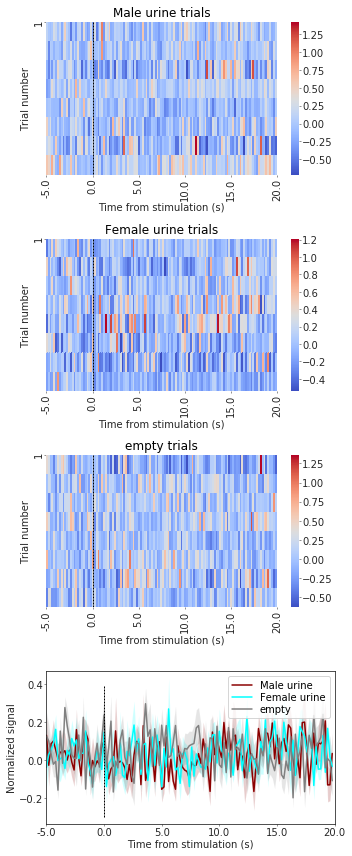

In [23]:
# plot normalized signal for each roi
plot_rasters_PSTH_KI(range(signals.shape[0]), keys_withtrials, result_dict,'solenoid_align',signal_type,
                  after_frames, before_frames, framerate,
                  colors_for_key, indir, 'Normalized signal%s'%(analysis_condition), os.path.join(figuredir,filename), rasters=True, PSTH=True, sortby=None)

Male urine
(8L, 43L, 125L)
25
Female urine
(8L, 43L, 125L)
25
empty
(8L, 43L, 125L)
25
Male urine (43L, 125L)
Female urine (43L, 125L)
empty (43L, 125L)


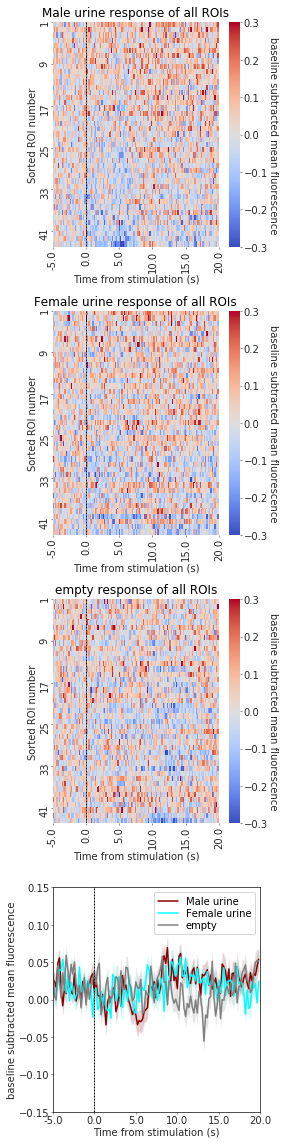

In [27]:
#plot the average signals for each roi 

numrois = signals.shape[0]

if 'None' in keys_withtrials:
    keys_withtrials.remove('None')
    
sortby = 'reward response'
centraltendency='baseline subtracted mean'

cmin_for_key = np.nan*np.ones((len(keys_withtrials),))
cmax_for_key = np.nan*np.ones((len(keys_withtrials),))
temp=0

populationdata_for_key = {}
sortresponse_for_key = {}
for k, key in enumerate(keys_withtrials):
    print key
    print result_dict['solenoid_align'][key][signal_type][:,:,:].shape
    print before_frames
    populationdata = calculate_centraltendency_for_rois_KI(result_dict['solenoid_align'][key][signal_type][:,:,:],
                                                        before_frames-1, centraltendency=centraltendency)
    populationdata_for_key[key] = populationdata
    cmin_for_key[k] = np.amin(populationdata)
    cmax_for_key[k] = np.amax(populationdata)
    if key == 'Male urine':
        # Sort by reward response
        if sortby=='reward response':
            #collect the 2*before time period to calculate the response to stimuli
            tempresponse = np.mean(populationdata[:,before_frames:2*before_frames],
                                   axis=1)
        elif sortby=='':
            tempresponse = np.arange(0,numrois)
        sortresponse = np.argsort(tempresponse)[::-1]
#print np.argsort(np.percentile(signals, 5, axis=1))[::-1]
#print np.percentile(signals, 5, axis=1)[np.argsort(np.percentile(signals, 5, axis=1))[::-1]]



cmin = -0.3
cmax = 0.3

sortby = 'reward response'
centraltendency='baseline subtracted mean'

f, axs = plt.subplots(len(keys_withtrials)+1, figsize=(4,4*(len(keys_withtrials)+1)))
for k, key in enumerate(keys_withtrials):
    print key, populationdata_for_key[key].shape
    cax = sns.heatmap(populationdata_for_key[key][sortresponse,:],
                ax=axs[k],
                cmap=plt.get_cmap('coolwarm'),
                vmin=-cmax,
                vmax=cmax,
                     rasterized=True)
    axs[k].grid(False)
    axs[k].set_title('%s response of all ROIs'%key)
    if sortby:
        axs[k].set_ylabel('Sorted ROI number')
    else:
        axs[k].set_ylabel('ROI number')
    axs[k].set_xlabel('Time from stimulation (s)')
    axs[k].set_xticks(range(0, (before_frames+after_frames+int(5*framerate)), int(5*framerate)))
    axs[k].set_xticklabels([str(((a-before_frames)/framerate)) for a in range(0, (before_frames+after_frames+int(5*framerate)), int(5*framerate))])
    axs[k].set_yticks(range(0, numrois, numrois/5))
    axs[k].set_yticklabels([str(a+1) for a in range(0, numrois, numrois/5)])
    axs[k].plot([before_frames, before_frames],
                [0, numrois], '--k', linewidth=1)
#     axs[k].plot([pre_window_size+before*1000*framerate*1E-3, pre_window_size+before*1000*framerate*1E-3],
#                 [0, numrois], '--k', linewidth=1)

    cbar = cax.collections[0].colorbar
    #cbar.set_ticks([-0.2, 0, 0.2])
    #cbar.set_ticklabels(['-0.2', '0', '0.2'])
    cbar.set_label('%s fluorescence'%centraltendency, rotation='270', labelpad=10)#, fontsize='5', labelpad=10)

    sns.tsplot(populationdata_for_key[key], ax=axs[-1], color=colors_for_key[key], condition=key)

axs[-1].set_xticks(range(0, (before_frames+after_frames+int(5*framerate)), int(5*framerate)))
axs[-1].set_xticklabels([str(((a-before_frames+0.0)/framerate)) for a in range(0, (before_frames+after_frames+int(5*framerate)), int(5*framerate))])

axs[-1].plot([before_frames, before_frames], 
         [cmin-0.1, cmax+0.1],
         '--k', linewidth=1)  
# axs[-1].plot([pre_window_size+before_frames, pre_window_size+before_frames],
#          [cmin-0.1, cmax+0.1],
#          '--k', linewidth=1)
axs[-1].set_xlabel('Time from stimulation (s)')
axs[-1].set_ylabel('%s fluorescence'%centraltendency)
axs[-1].set_ylim([0.5*cmin, 0.5*cmax])
# axs[-1].set_ylim([-0.2, 0.4])
#axs[-1].legend(loc='upper right')
f.tight_layout()

if neuropil=='nonneuropilcorrected':
    tempstr = 'populationresponse%s_%s%s'%(sortby,
                                           neuropil,
                                           analysis_condition)
else:
    if beta_neuropil != 'calculated':
        tempstr = 'populationresponse%s_%s_%s%d_%d_beta_%.1f'%(sortby, neuropil,
                                                               analysis_condition,
                                                               min_neuropil_radius,
                                                               neuropil_radius,
                                                               beta_neuropil)
    else:
        tempstr = 'populationresponse%s_%s%s_%d_%d_betacalculated'%(sortby,
                                                                    neuropil,
                                                                    analysis_condition,
                                                                    min_neuropil_radius,
                                                                    neuropil_radius)

# f.savefig(os.path.join(indir, 'results', tempstr+'.pdf'), format='pdf')
f.savefig(os.path.join(figuredir,filename, tempstr+'.png'), format='png', dpi=300)
#     raise Exception()

keys_withtrials = metadata.Session_type.values[0].split('_')

In [25]:
# export result as pickle file
with open(os.path.join(resultdir,
                       filename +'_'+ 'Alignedtotrial_%s%s%s.pickle'%(normalization,
                                                       signal_type,
                                                       analysis_condition)),
          'wb') as f:
    pickle.dump(result_dict, f)



## Spontanaous activity

In [102]:
#create directory for spontanaous activity
spontdir = os.path.join(spontaneousdir,filename)

for x in [spontdir]:
    if not os.path.exists(x):
        os.mkdir(x)

In [103]:
#average
import peakutils

average = np.average(signals,axis = 0)
baseline = peakutils.baseline(average)
signals_nomalized = (average - baseline)/baseline

fig, axs= plt.subplots(4,5,figsize=(20, 10))

for Z in range(20):
    X = Z%4
    Y = Z/4
    
    axs[X,Y].plot(np.linspace(0,200,signals.shape[1]),signals_nomalized)
    axs[X,Y].set_xlim(Z*10,(Z+1)*10)
    [axs[X,Y].axvline(x=x*200/signals.shape[1],ymin=0,ymax=100,color = 'black',ls = ':') for x in framenumberforsol['sucrose']]
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)
plt.xlabel("Normalized signal")
plt.ylabel("Relative time")
plt.savefig(os.path.join(spontdir,"average_spontaneous.png"),format = 'png',dpi = 216,bbox_inches = 'tight')
plt.close()

c:\users\stuber_lab\anaconda3\envs\py27\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [104]:
#individual
for roi in range(signals.shape[0]):
    fig, axs= plt.subplots(4,5,figsize=(20, 10))
    plt.title("roi : " + str(roi +1))
    for Z in range(20):
        X = Z%4
        Y = Z/4
        axs[X,Y].plot(np.linspace(0,200,signals.shape[1]),signals[roi])
        axs[X,Y].set_xlim(Z*10,(Z+1)*10)
        [axs[X,Y].axvline(x=x*209/signals.shape[1],ymin=0,ymax=100,color = 'black',ls = ':') for x in framenumberforsol['sucrose']]
    fig.add_subplot(111, frameon=False)
    # hide tick and tick label of the big axes
    plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
    plt.grid(False)
    plt.xlabel("Normalized signal")
    plt.ylabel("Relative time")
    plt.savefig(os.path.join(spontdir,"roi_" + str(roi+1) + "_average_spontaneous.png"),format = 'png',dpi = 216,bbox_inches = 'tight')
    plt.close()

## Loop for all condition
Use the names in the meta file.

In [81]:
# collect a list of filenames from meta data file.

filenames = metainfo[metainfo.z_plane == 360][metainfo.d != 7][metainfo.d != 8].filename.dropna()
analysis_condition = ''#'_untilfirstquinine'# '_history' 

c:\users\stuber_lab\anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Analyzing KI_m120_d1_z360_1p3x...
['water', 'sucrose']
Analyzing two-solenoid experiment...
water
(30L, 43L, 125L)
25
sucrose
(30L, 43L, 125L)
25
water (43L, 125L)
sucrose (43L, 125L)


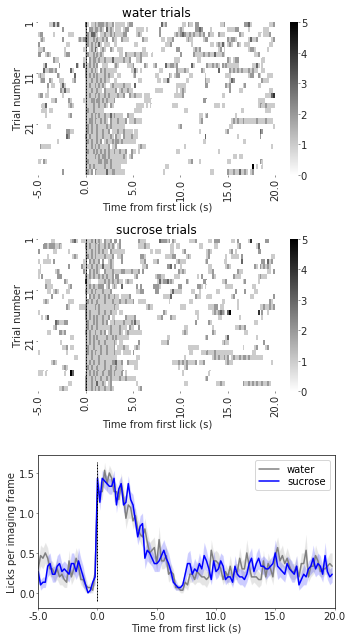

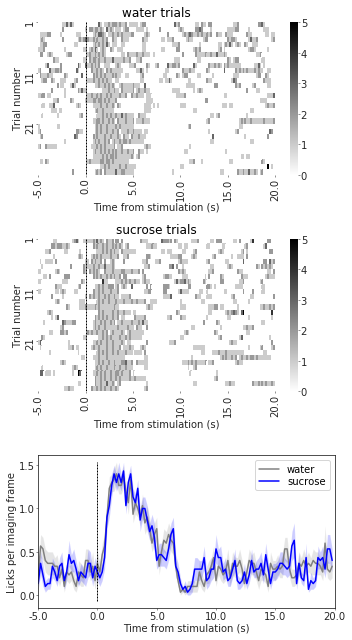

<Figure size 360x648 with 0 Axes>

<Figure size 360x648 with 0 Axes>

<Figure size 360x648 with 0 Axes>

<Figure size 360x648 with 0 Axes>

<Figure size 360x648 with 0 Axes>

<Figure size 360x648 with 0 Axes>

<Figure size 360x648 with 0 Axes>

<Figure size 360x648 with 0 Axes>

<Figure size 360x648 with 0 Axes>

<Figure size 360x648 with 0 Axes>

<Figure size 360x648 with 0 Axes>

<Figure size 360x648 with 0 Axes>

<Figure size 360x648 with 0 Axes>

<Figure size 360x648 with 0 Axes>

<Figure size 360x648 with 0 Axes>

<Figure size 360x648 with 0 Axes>

<Figure size 360x648 with 0 Axes>

<Figure size 360x648 with 0 Axes>

<Figure size 360x648 with 0 Axes>

<Figure size 360x648 with 0 Axes>

<Figure size 360x648 with 0 Axes>

<Figure size 360x648 with 0 Axes>

<Figure size 360x648 with 0 Axes>

<Figure size 360x648 with 0 Axes>

<Figure size 360x648 with 0 Axes>

<Figure size 360x648 with 0 Axes>

<Figure size 360x648 with 0 Axes>

<Figure size 360x648 with 0 Axes>

<Figure size 360x648 with 0 Axes>

<Figure size 360x648 with 0 Axes>

<Figure size 360x648 with 0 Axes>

<Figure size 360x648 with 0 Axes>

<Figure size 360x648 with 0 Axes>

<Figure size 360x648 with 0 Axes>

<Figure size 360x648 with 0 Axes>

<Figure size 360x648 with 0 Axes>

<Figure size 360x648 with 0 Axes>

<Figure size 360x648 with 0 Axes>

<Figure size 360x648 with 0 Axes>

<Figure size 360x648 with 0 Axes>

<Figure size 360x648 with 0 Axes>

<Figure size 360x648 with 0 Axes>

<Figure size 360x648 with 0 Axes>

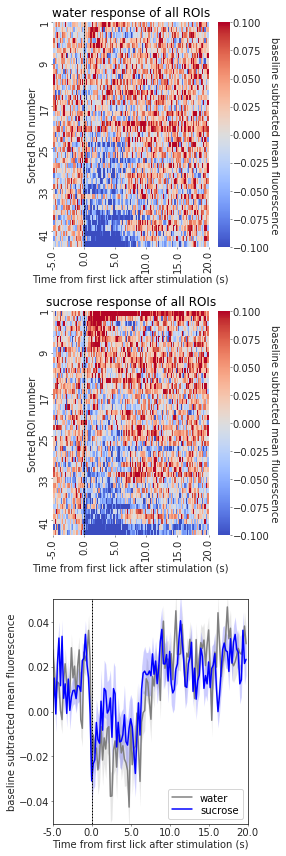

In [36]:
# Define the time window of each trial
before = 5 #in seconds
after = 20 

#gigantic loop
for filename in filenames:
    print "Analyzing " + filename +"..."
    #load metainfo
    metadata = metainfo[metainfo.filename == filename]
    frameaveraging = int(metadata.frameaveraging.values[0])
    samplingrate = metadata.samplingrate.values[0]
    framerate = samplingrate/frameaveraging #for resonant scanner, maximum rate is 30Hz

    before_frames = int(before*framerate)
    after_frames = int(after*framerate)

    window_length = int((before + after)*framerate) #in frames

    keys_withtrials = metadata.Session_type.values[0].split('_')
    print keys_withtrials
    # main data directory
    indir = os.path.join(rootdir,metadata.path.values[0])

    # what type of experiment?
    exptype = metadata.Session_type.values[0]

    #load the data files
    h5file = [f for f in os.listdir(indir) if filename in f][0]
    behaviordata = sio.loadmat(os.path.join(behaviordir,[f for f in os.listdir(behaviordir) if filename in f][0]))


    npyfile = [f for f in os.listdir(indir) if filename in f and type_signal in f][0]
    signals = np.squeeze(np.load(os.path.join(indir,npyfile)))
    #set specific parameters
    frameaveraging = int(metadata.frameaveraging.values[0])
    samplingrate = metadata.samplingrate.values[0]
    framerate = samplingrate/frameaveraging #for resonant scanner, maximum rate is 30Hz
    if len(metadata.Session_type.values[0].split('_')) == 2:
        print "Analyzing two-solenoid experiment..."
        experiment_type = "two-solenoid"

        #read eventlog
        eventlog = np.squeeze(behaviordata['eventlog'])
        params = behaviordata['params']

        #check the type of time stamps.
        #print(np.unique(eventlog[:,0]))

        #create arrays for each event type in eventlog
        #lick times
        lick_on = eventlog[eventlog[:,0] == 1,1]
        lick_off = eventlog[eventlog[:,0] == 2,1]

        #vacuum times
        vacuum_on = eventlog[eventlog[:,0] == 10,1] 
        #2p frames
        frame_in = eventlog[eventlog[:,0] == 20,1]

        #Solenoid time stamps
        sol1_on = eventlog[eventlog[:,0] == 101,1]
        sol2_on = eventlog[eventlog[:,0] == 102,1]
            # Create a frame sequence. The frames would be sotred in var frames.
        if len(frame_in)>0:
            diff_frames = np.diff(frame_in) #calculate the frame interval
            if np.amin(diff_frames) < np.median(diff_frames) - 5*stats.iqr(diff_frames):
                last_timestamp = eventlog[-1,1]  # assuming last timestamp is a good approximation for the end of the session
                tempframerate = (last_timestamp+0.0)/signals.shape[1]
                frames = np.array([a*tempframerate for a in range(signals.shape[1])])
            else:
                tempframes = fix_any_dropped_frames(frame_in)
                frames = frame_in[::frameaveraging]
                if frames[-1]<sol1_on[-1]+5000: # case 2 above
                    #adjust the length of each event array
                    print 'Case2'
                    lick_on = lick_on[lick_on<=frames[-1]]
                    lick_off = lick_off[lick_off<=frames[-1]]
                    vacuum_on = vacuum_on[vacuum_on<=frames[-1]]
                    sol1_on = sol1_on[sol1_on<=frames[-1]]
                    sol2_on = sol2_on[sol2_on<=frames[-1]]
                if len(frames)<signals.shape[1]:  # case 3 above
                    print 'Case3'
                    signals = signals[:, :len(frames)]
                if len(frames)>signals.shape[1]:
                    print 'Case3'
                    frames = frames[:signals.shape[1]]
        else:  # frames input was absent (Case 1 above)
            last_timestamp = eventlog[-1,1]  # assuming last timestamp is a good approximation for the end of the session
            tempframerate = (last_timestamp+0.0)/signals.shape[1]
            frames = np.array([a*tempframerate for a in range(signals.shape[1])])



        # if the end of signals is shorter than the off set of last window, it would result in short trials for the last stim.
        # to prevent this, I include a code to fill the sinals sequence with nan until the end.      

        signals = np.append(signals,np.full([signals.shape[0],300], np.nan),axis = 1)

        # get what solenoid 1 and 2 is.
        # The sesstion type in meta file states the two stimuli. XX_YY : sol1 is XX, sol2 is YY.
        [sol1_stim, sol2_stim] = metadata.Session_type.values[0].split('_')

        #collect the first lick after each event, to allign the traces.
        firstlick_after_sol1 = firstlick_after_event(sol1_on, lick_on)
        firstlick_after_sol2 = firstlick_after_event(sol2_on, lick_on)
        #convert to frame
        framenumberforfirstlicksol1 = np.squeeze(framenumberforevent(firstlick_after_sol1, frames))
        framenumberforfirstlicksol1 = framenumberforfirstlicksol1[~np.isnan(framenumberforfirstlicksol1)]
        framenumberforfirstlicksol2 = np.squeeze(framenumberforevent(firstlick_after_sol2, frames))
        framenumberforfirstlicksol2 = framenumberforfirstlicksol2[~np.isnan(framenumberforfirstlicksol2)]

        #collect the lick timings
        framenumberforlicks = np.squeeze(framenumberforevent(lick_on, frames))
        numlicksperframe = calculate_num_licks_for_each_frame(framenumberforlicks, frames.shape[0])
        lick_bout_onsets = calculate_lick_bout_onsets(lick_on) #calculates the first lick of the train of licks

        # if the end of signals is shorter than the off set of last window, it would result in short trials for the last stim.
        # to prevent this, I include a code to fill the sinals sequence with nan until the end.      

        numlicksperframe = np.append(numlicksperframe,np.full(300, 0),axis = 0)



        #collect the frame number for events
        framenumberforsol1 = np.squeeze(framenumberforevent(sol1_on, frames))
        framenumberforsol2 = np.squeeze(framenumberforevent(sol2_on, frames))

        #drop if there is no licks in each window
        framenumberforsol1 = framenumberforsol1[np.invert(np.isnan(firstlick_after_sol1))]
        framenumberforsol2 = framenumberforsol2[np.invert(np.isnan(firstlick_after_sol2))]

        #prepare dictionary space to store results
        result_dict = {}

        result_dict['solenoid_align'] = {}
        result_dict['lick_align'] ={}
        result_dict['solenoid_align'][sol1_stim] =  {}
        result_dict['solenoid_align'][sol2_stim] =  {}
        result_dict['lick_align'][sol1_stim] ={}
        result_dict['lick_align'][sol2_stim] ={}



        #create an array containing licks per frame 
        result_dict['solenoid_align'][sol1_stim]['Number_licks_per_frame'] =  np.asarray([numlicksperframe[int(f-before_frames):int(f + after_frames)]   for f in framenumberforsol1])
        result_dict['solenoid_align'][sol2_stim]['Number_licks_per_frame'] =  np.asarray([numlicksperframe[int(f-before_frames):int(f + after_frames)]  for f in framenumberforsol2])
        result_dict['lick_align'][sol1_stim]['Number_licks_per_frame'] =  np.asarray([numlicksperframe[int(f-before_frames):int(f + after_frames)]  for f in framenumberforfirstlicksol1])
        result_dict['lick_align'][sol2_stim]['Number_licks_per_frame'] =  np.asarray([numlicksperframe[int(f-before_frames):int(f + after_frames)]  for f in framenumberforfirstlicksol2])

        #create an array containing the lick timing in miliseconds
        result_dict['solenoid_align'][sol1_stim]['Licks_in_ms'] =  np.asarray([lick_on[(lick_on > f-(before_frames/framerate)*1000) & (framenumberforlicks < f + (after_frames/framerate)*1000)]-f for f in sol1_on])
        result_dict['solenoid_align'][sol2_stim]['Licks_in_ms'] =  np.asarray([lick_on[(lick_on > f-(before_frames/framerate)*1000) & (framenumberforlicks < f + (after_frames/framerate)*1000)]-f for f in sol2_on])
        result_dict['lick_align'][sol1_stim]['Licks_in_ms'] =  np.asarray([lick_on[(lick_on > f-(before_frames/framerate)*1000) & (framenumberforlicks < f + (after_frames/framerate)*1000)]-f for f in framenumberforfirstlicksol1/5*1000])
        result_dict['lick_align'][sol2_stim]['Licks_in_ms'] =  np.asarray([lick_on[(lick_on > f-(before_frames/framerate)*1000) & (framenumberforlicks < f + (after_frames/framerate)*1000)]-f for f in framenumberforfirstlicksol2/5*1000])



        #create an array containing signal 
        #the structure is [trial][roi][signal]
        result_dict['solenoid_align'][sol1_stim]['signal'] =  np.array([signals[:,int(f-before_frames):int(f + after_frames)]  for f in framenumberforsol1])
        result_dict['solenoid_align'][sol2_stim]['signal'] =  np.array([signals[:,int(f-before_frames):int(f + after_frames)] for f in framenumberforsol2])
        result_dict['lick_align'][sol1_stim]['signal'] =  np.array([signals[:,int(f-before_frames):int(f + after_frames)] for f in framenumberforfirstlicksol1])
        result_dict['lick_align'][sol2_stim]['signal'] =  np.array([signals[:,int(f-before_frames):int(f + after_frames)] for f in framenumberforfirstlicksol2])


        #create an array containing signal 
        #the structure is [trial][roi][signal]
        result_dict['solenoid_align'][sol1_stim]['signal'] =  np.array([signals[:,int(f-before_frames):int(f + after_frames)]  for f in framenumberforsol1])
        result_dict['solenoid_align'][sol2_stim]['signal'] =  np.array([signals[:,int(f-before_frames):int(f + after_frames)] for f in framenumberforsol2])
        result_dict['lick_align'][sol1_stim]['signal'] =  np.array([signals[:,int(f-before_frames):int(f + after_frames)] for f in framenumberforfirstlicksol1])
        result_dict['lick_align'][sol2_stim]['signal'] =  np.array([signals[:,int(f-before_frames):int(f + after_frames)] for f in framenumberforfirstlicksol2])



        #create an array containing signal 
        #the structure is [trial][roi][signal]
        result_dict['solenoid_align'][sol1_stim]['signal_norm'] =  normalize_signal_3d(result_dict['solenoid_align'][sol1_stim]['signal'],before_frames)
        result_dict['solenoid_align'][sol2_stim]['signal_norm'] =  normalize_signal_3d(result_dict['solenoid_align'][sol2_stim]['signal'],before_frames)
        result_dict['lick_align'][sol1_stim]['signal_norm'] =  normalize_signal_3d(result_dict['lick_align'][sol1_stim]['signal'],before_frames)
        result_dict['lick_align'][sol2_stim]['signal_norm'] =  normalize_signal_3d(result_dict['lick_align'][sol2_stim]['signal'],before_frames)

        #create a dictionary for colors
        colors_for_key = {}

        colors_for_key['sucrose'] = 'b'
        colors_for_key['quinine'] = 'r'
        colors_for_key['water'] = 'gray'

        # use this variable to store the stimuli
        keys_withtrials = metadata.Session_type.values[0].split('_')

        # plot the number of licks aligned to first lick
        plot_rasters_PSTH_KI(None, keys_withtrials, result_dict,'lick_align','Number_licks_per_frame',
                          after_frames, before_frames, framerate,
                          colors_for_key, indir, 'Licks per imaging frame%s'%(analysis_condition), os.path.join(figuredir,filename), rasters=True, PSTH=True, sortby=None)

        # plot the number of licks aligned to solenoid opening
        plot_rasters_PSTH_KI(None, keys_withtrials, result_dict,'solenoid_align','Number_licks_per_frame',
                          after_frames, before_frames, framerate,
                          colors_for_key, indir, 'Licks per imaging frame%s'%(analysis_condition), os.path.join(figuredir,filename), rasters=True, PSTH=True, sortby=None)

        # plot normalized signal for each roi
        plot_rasters_PSTH_KI(range(signals.shape[0]), keys_withtrials, result_dict,'lick_align','signal_norm',
                          after_frames, before_frames, framerate,
                          colors_for_key, indir, 'Normalized signal%s'%(analysis_condition), os.path.join(figuredir,filename), rasters=True, PSTH=True, sortby=None)

        #plot the average signals for each roi 

        numrois = signals.shape[0]


        sortby = 'reward response'
        centraltendency='baseline subtracted mean'

        cmin_for_key = np.nan*np.ones((len(keys_withtrials),))
        cmax_for_key = np.nan*np.ones((len(keys_withtrials),))
        temp=0

        populationdata_for_key = {}
        sortresponse_for_key = {}
        for k, key in enumerate(keys_withtrials):
            print key
            print result_dict['lick_align'][key]['signal_norm'][:,:,:].shape
            print before_frames
            populationdata = calculate_centraltendency_for_rois_KI(result_dict['lick_align'][key]['signal_norm'][:,:,:],
                                                                before_frames-1, centraltendency=centraltendency)
            populationdata_for_key[key] = populationdata
            cmin_for_key[k] = np.amin(populationdata)
            cmax_for_key[k] = np.amax(populationdata)
            if (key == 'sucrose')|(key == 'quinine'):
                # Sort by reward response
                if sortby=='reward response':
                    #collect the 2*before time period to calculate the response to stimuli
                    tempresponse = np.mean(populationdata[:,before_frames:2*before_frames],
                                           axis=1)
                elif sortby=='':
                    tempresponse = np.arange(0,numrois)
                sortresponse = np.argsort(tempresponse)[::-1]
        #print np.argsort(np.percentile(signals, 5, axis=1))[::-1]
        #print np.percentile(signals, 5, axis=1)[np.argsort(np.percentile(signals, 5, axis=1))[::-1]]



        cmin = -0.1
        cmax = 0.1

        sortby = 'reward response'
        centraltendency='baseline subtracted mean'

        f, axs = plt.subplots(len(keys_withtrials)+1, figsize=(4,4*(len(keys_withtrials)+1)))
        for k, key in enumerate(keys_withtrials):
            print key, populationdata_for_key[key].shape
            cax = sns.heatmap(populationdata_for_key[key][sortresponse,:],
                        ax=axs[k],
                        cmap=plt.get_cmap('coolwarm'),
                        vmin=-cmax,
                        vmax=cmax,
                             rasterized=True)
            axs[k].grid(False)
            axs[k].set_title('%s response of all ROIs'%key)
            if sortby:
                axs[k].set_ylabel('Sorted ROI number')
            else:
                axs[k].set_ylabel('ROI number')
            axs[k].set_xlabel('Time from first lick after stimulation (s)')
            axs[k].set_xticks(range(0, (before_frames+after_frames+int(5*framerate)), int(5*framerate)))
            axs[k].set_xticklabels([str(((a-before_frames)/framerate)) for a in range(0, (before_frames+after_frames+int(5*framerate)), int(5*framerate))])
            axs[k].set_yticks(range(0, numrois, numrois/5))
            axs[k].set_yticklabels([str(a+1) for a in range(0, numrois, numrois/5)])
            axs[k].plot([before_frames, before_frames],
                        [0, numrois], '--k', linewidth=1)
        #     axs[k].plot([pre_window_size+before*1000*framerate*1E-3, pre_window_size+before*1000*framerate*1E-3],
        #                 [0, numrois], '--k', linewidth=1)

            cbar = cax.collections[0].colorbar
            #cbar.set_ticks([-0.2, 0, 0.2])
            #cbar.set_ticklabels(['-0.2', '0', '0.2'])
            cbar.set_label('%s fluorescence'%centraltendency, rotation='270', labelpad=10)#, fontsize='5', labelpad=10)

            sns.tsplot(populationdata_for_key[key], ax=axs[-1], color=colors_for_key[key], condition=key)

        axs[-1].set_xticks(range(0, (before_frames+after_frames+int(5*framerate)), int(5*framerate)))
        axs[-1].set_xticklabels([str(((a-before_frames+0.0)/framerate)) for a in range(0, (before_frames+after_frames+int(5*framerate)), int(5*framerate))])

        axs[-1].plot([before_frames, before_frames], 
                 [cmin-0.1, cmax+0.1],
                 '--k', linewidth=1)  
        # axs[-1].plot([pre_window_size+before_frames, pre_window_size+before_frames],
        #          [cmin-0.1, cmax+0.1],
        #          '--k', linewidth=1)
        axs[-1].set_xlabel('Time from first lick after stimulation (s)')
        axs[-1].set_ylabel('%s fluorescence'%centraltendency)
        axs[-1].set_ylim([0.5*cmin, 0.5*cmax])
        # axs[-1].set_ylim([-0.2, 0.4])
        #axs[-1].legend(loc='upper right')
        f.tight_layout()

        if neuropil !='y':
            tempstr = 'populationresponse%s_%s%s'%(sortby,
                                                   neuropil,
                                                   analysis_condition)
        elif neuropil == 'y':
            if beta_neuropil != 'calculated':
                tempstr = 'populationresponse%s_%s_%s%d_%d_beta_%.1f'%(sortby, neuropil,
                                                                       analysis_condition,
                                                                       min_neuropil_radius,
                                                                       neuropil_radius,
                                                                       beta_neuropil)
            else:
                tempstr = 'populationresponse%s_%s%s_%d_%d_betacalculated'%(sortby,
                                                                            neuropil,
                                                                            analysis_condition,
                                                                            min_neuropil_radius,
                                                                            neuropil_radius)

        # f.savefig(os.path.join(indir, 'results', tempstr+'.pdf'), format='pdf')
        f.savefig(os.path.join(figuredir,filename, tempstr+'.png'), format='png', dpi=300)
        #     raise Exception()

    elif len(metadata.Session_type.values[0].split('_')) == 4:
        print "Analyzing odor stimulation experiment..."
        experiment_type = "odor-stimulation"

        # get what odors are used.
        # The sesstion type in meta file states the two stimuli. odor1_odor2_odor3_odor4.
        keys_withtrials = metadata.Session_type.values[0].split('_')

        print keys_withtrials

        #read eventlog
        eventlog = np.squeeze(behaviordata['eventlog'])
        params = behaviordata['params']

        #check the type of time stamps.
        #print(np.unique(eventlog[:,0]))

        #2p frames
        frame_in = eventlog[eventlog[:,0] == 20,1]

        #create a dictionary to store odor onset time stamps
        odor_timestamps = {}
        for k,key in enumerate(keys_withtrials):
            odor_timestamps[key] = eventlog[eventlog[:,0] == 101 + k,1]

        # the number of total trials
        n_odor_trials = np.sum(np.array([len(odor_timestamps[key]) for key in odor_timestamps.keys()]))

        # extract the duration of stimulation for each odor.
        # this part is Arduino code specific.
        tempdf = np.array([params[0].split('+')[-n_odor_trials*2:-n_odor_trials],params[0].split('+')[-24:]],dtype = 'int')
        odorduration = {}
        for k,key in enumerate(metadata.Session_type.values[0].split('_')):
            if len(tempdf[1][tempdf[0] == k+1]) != 0:
                odorduration[key] = np.unique(tempdf[1][tempdf[0] == k+1])[0]   

        # Create a frame sequence. The frames would be sotred in var frames.
        if len(frame_in)>0:
            diff_frames = np.diff(frame_in) #calculate the frame interval
            if np.amin(diff_frames) < np.median(diff_frames) - 5*stats.iqr(diff_frames):
                last_timestamp = eventlog[-1,1]  # assuming last timestamp is a good approximation for the end of the session
                tempframerate = (last_timestamp+0.0)/signals.shape[1]
                frames = np.array([a*tempframerate for a in range(signals.shape[1])])
            else:
                tempframes = fix_any_dropped_frames(frame_in)
                frames = frame_in[::frameaveraging]
                if frames[-1]<odor_timestamps[odor_timestamps.keys()[3]][-1]+5000: # case 2 above
                    print "Case2 bug"
                if len(frames)<signals.shape[1]:  # case 3 above
                    print 'Case3'
                    signals = signals[:, :len(frames)]
                if len(frames)>signals.shape[1]:
                    print 'Case3'
                    frames = frames[:signals.shape[1]]
        else:  # frames input was absent (Case 1 above)
            last_timestamp = eventlog[-1,1]  # assuming last timestamp is a good approximation for the end of the session
            tempframerate = (last_timestamp+0.0)/signals.shape[1]
            frames = np.array([a*tempframerate for a in range(signals.shape[1])])


        # if the end of signals is shorter than the off set of last window, it would result in short trials for the last stim.
        # to prevent this, I include a code to fill the sinals sequence with nan until the end.      

        signals = np.append(signals,np.full([signals.shape[0],300], np.nan),axis = 1)

        #collect the frame number for events in a dictionary
        framenumberforodors = {}
        for k,key in enumerate(keys_withtrials):
            framenumberforodors[key] =  np.squeeze(framenumberforevent(odor_timestamps[key], frames))
        #prepare dictionary space to store results
        result_dict = {}

        result_dict['solenoid_align'] = {}
        for key in keys_withtrials:
            result_dict['solenoid_align'][key] = {}
        #create an array containing raw signal and normalized signal, store in dictionary
        #the structure is [trial][roi][signal]
        for k,key in enumerate(keys_withtrials):
            result_dict['solenoid_align'][key]['signal'] =  np.array([signals[:,int(f-before_frames):int(f + after_frames)]  for f in framenumberforodors[key]])
            result_dict['solenoid_align'][key]['signal_norm'] =normalize_signal_3d(result_dict['solenoid_align'][key]['signal'],before_frames)

        #create a dictionary for colors
        colors_for_key = {}

        colors_for_key['Female urine'] = 'cyan'
        colors_for_key['Male urine'] = 'darkred'
        colors_for_key['empty'] = 'gray'
        colors_for_key['None'] = ''
        colors_for_key['Male urine 1/10'] = 'firebrick'
        colors_for_key['Male urine 1/100'] = 'indianred'
        colors_for_key['Male urine 1/1000'] = 'lightcoral'

        # plot normalized signal for each roi
        plot_rasters_PSTH_KI(range(signals.shape[0]), keys_withtrials, result_dict,'solenoid_align','signal_norm',
                          after_frames, before_frames, framerate,
                          colors_for_key, indir, 'Normalized signal%s'%(analysis_condition), os.path.join(figuredir,filename), rasters=True, PSTH=True, sortby=None)    

        #plot the average signals for each roi 

        numrois = signals.shape[0]

        if 'None' in keys_withtrials:
            keys_withtrials.remove('None')

        sortby = 'reward response'
        centraltendency='baseline subtracted mean'

        cmin_for_key = np.nan*np.ones((len(keys_withtrials),))
        cmax_for_key = np.nan*np.ones((len(keys_withtrials),))
        temp=0

        populationdata_for_key = {}
        sortresponse_for_key = {}
        for k, key in enumerate(keys_withtrials):
            print key
            print result_dict['solenoid_align'][key]['signal_norm'][:,:,:].shape
            print before_frames
            populationdata = calculate_centraltendency_for_rois_KI(result_dict['solenoid_align'][key]['signal_norm'][:,:,:],
                                                                before_frames-1, centraltendency=centraltendency)
            populationdata_for_key[key] = populationdata
            cmin_for_key[k] = np.amin(populationdata)
            cmax_for_key[k] = np.amax(populationdata)
            if key == 'Male urine':
                # Sort by reward response
                if sortby=='reward response':
                    #collect the 2*before time period to calculate the response to stimuli
                    tempresponse = np.mean(populationdata[:,before_frames:2*before_frames],
                                           axis=1)
                elif sortby=='':
                    tempresponse = np.arange(0,numrois)
                sortresponse = np.argsort(tempresponse)[::-1]
        #print np.argsort(np.percentile(signals, 5, axis=1))[::-1]
        #print np.percentile(signals, 5, axis=1)[np.argsort(np.percentile(signals, 5, axis=1))[::-1]]



        cmin = -0.3
        cmax = 0.3

        sortby = 'reward response'
        centraltendency='baseline subtracted mean'

        f, axs = plt.subplots(len(keys_withtrials)+1, figsize=(4,4*(len(keys_withtrials)+1)))
        for k, key in enumerate(keys_withtrials):
            print key, populationdata_for_key[key].shape
            cax = sns.heatmap(populationdata_for_key[key][sortresponse,:],
                        ax=axs[k],
                        cmap=plt.get_cmap('coolwarm'),
                        vmin=-cmax,
                        vmax=cmax,
                             rasterized=True)
            axs[k].grid(False)
            axs[k].set_title('%s response of all ROIs'%key)
            if sortby:
                axs[k].set_ylabel('Sorted ROI number')
            else:
                axs[k].set_ylabel('ROI number')
            axs[k].set_xlabel('Time from stimulation (s)')
            axs[k].set_xticks(range(0, (before_frames+after_frames+int(5*framerate)), int(5*framerate)))
            axs[k].set_xticklabels([str(((a-before_frames)/framerate)) for a in range(0, (before_frames+after_frames+int(5*framerate)), int(5*framerate))])
            axs[k].set_yticks(range(0, numrois, numrois/5))
            axs[k].set_yticklabels([str(a+1) for a in range(0, numrois, numrois/5)])
            axs[k].plot([before_frames, before_frames],
                        [0, numrois], '--k', linewidth=1)
        #     axs[k].plot([pre_window_size+before*1000*framerate*1E-3, pre_window_size+before*1000*framerate*1E-3],
        #                 [0, numrois], '--k', linewidth=1)

            cbar = cax.collections[0].colorbar
            #cbar.set_ticks([-0.2, 0, 0.2])
            #cbar.set_ticklabels(['-0.2', '0', '0.2'])
            cbar.set_label('%s fluorescence'%centraltendency, rotation='270', labelpad=10)#, fontsize='5', labelpad=10)

            sns.tsplot(populationdata_for_key[key], ax=axs[-1], color=colors_for_key[key], condition=key)

        axs[-1].set_xticks(range(0, (before_frames+after_frames+int(5*framerate)), int(5*framerate)))
        axs[-1].set_xticklabels([str(((a-before_frames+0.0)/framerate)) for a in range(0, (before_frames+after_frames+int(5*framerate)), int(5*framerate))])

        axs[-1].plot([before_frames, before_frames], 
                 [cmin-0.1, cmax+0.1],
                 '--k', linewidth=1)  
        # axs[-1].plot([pre_window_size+before_frames, pre_window_size+before_frames],
        #          [cmin-0.1, cmax+0.1],
        #          '--k', linewidth=1)
        axs[-1].set_xlabel('Time from stimulation (s)')
        axs[-1].set_ylabel('%s fluorescence'%centraltendency)
        axs[-1].set_ylim([0.5*cmin, 0.5*cmax])
        # axs[-1].set_ylim([-0.2, 0.4])
        #axs[-1].legend(loc='upper right')
        f.tight_layout()

        if neuropil=='nonneuropilcorrected':
            tempstr = 'populationresponse%s_%s%s'%(sortby,
                                                   neuropil,
                                                   analysis_condition)
        else:
            if beta_neuropil != 'calculated':
                tempstr = 'populationresponse%s_%s_%s%d_%d_beta_%.1f'%(sortby, neuropil,
                                                                       analysis_condition,
                                                                       min_neuropil_radius,
                                                                       neuropil_radius,
                                                                       beta_neuropil)
            else:
                tempstr = 'populationresponse%s_%s%s_%d_%d_betacalculated'%(sortby,
                                                                            neuropil,
                                                                            analysis_condition,
                                                                            min_neuropil_radius,
                                                                            neuropil_radius)

        # f.savefig(os.path.join(indir, 'results', tempstr+'.pdf'), format='pdf')
        f.savefig(os.path.join(figuredir,filename, tempstr+'.png'), format='png', dpi=300)
        #     raise Exception()

        keys_withtrials = metadata.Session_type.values[0].split('_')


    # export result as pickle file
    with open(os.path.join(resultdir,
                           filename +'_'+ experiment_type+'_' + 'Alignedtotrial_%s%s%s.pickle'%(normalization,
                                                           signal_type,
                                                           analysis_condition)),
              'wb') as f:
        pickle.dump(result_dict, f)


# Summarize data for multiple stimuli

This code summarizes all the data. It is basically designed to plot 2 states.

## Define parameters for summary plots

In [17]:
#create a dictionary for colors
colors_for_key = {}

colors_for_key['sucrose'] = 'green'
colors_for_key['quinine'] = 'red'
colors_for_key['water'] = 'gray'
colors_for_key['Female urine'] = 'cyan'
colors_for_key['Male urine'] = 'darkred'
colors_for_key['empty'] = 'gray'
colors_for_key['None'] = ''
colors_for_key['Male urine 1/10'] = 'firebrick'
colors_for_key['Male urine 1/100'] = 'indianred'
colors_for_key['Male urine 1/1000'] = 'lightcoral'

In [18]:
#set values for the plots
cmin = -0.25
cmax = 0.25


In [19]:
#set the conditions/states that the animals were kept in.
state1 = metainfo.Condition.unique()[0]
state2 = metainfo.Condition.unique()[1]
print "State 1 is " + state1
print "State 2 is " + state2


State 1 is None
State 2 is E


In [20]:
#set the type of signals to use
signal = 'signal_norm'
#set how to sort the responses
sortby_key = 'water'
sortby_key_state = state1
#set how to sort and calculate response
sortby = 'reward response'
centraltendency='baseline subtracted mean'

In [21]:
# Define the time window of each trial
metainfo
framerate = 5
before = 5 #in seconds
before_frames = int(before*framerate)
after = 20 
after_frames = int(after*framerate)

window_length = int((before + after)*framerate) #in frames

## Create result dictionary

Subset the files into the ones you will use to analyze

In [28]:
#subset the files
filenames = metainfo[(metainfo.z_plane == 360)|(metainfo.z_plane == 430)][metainfo.d != 8][metainfo.d != 7].filename.values

c:\users\stuber_lab\anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [29]:
#create a dictionary which contains all data
summary_result_dict = {}
summary_result_dict[state1] = {}
summary_result_dict[state2] = {}

for filename in filenames:
    filepath = [f for f in os.listdir(resultdir) if filename in f][0]

    temp_result_dict = pd.read_pickle(os.path.join(resultdir,filepath))
    type_state = str(metainfo[metainfo.filename == filename].Condition.values[0])
    session_type = metainfo[metainfo.filename == filename].Session_type.values[0]
    plane = metainfo[metainfo.filename == filename].z_plane.values[0]

    for key in temp_result_dict['solenoid_align'].keys():
        print filename
        print key
        if (session_type == 'quinine_water') and (key == 'water'):
            print "processing duplicate"
            duplicate = True
        else:
            duplicate = False
        summary_result_dict = append_dict(summary_result_dict,temp_result_dict,key,type_state,signal= signal,duplicate = duplicate)



KI_m120_d1_z360_1p3x
water
KI_m120_d1_z360_1p3x
sucrose
KI_m120_d2_z430_1p3x
water
KI_m120_d2_z430_1p3x
sucrose
KI_m120_d3_z360_1p3x
water
processing duplicate
skip
KI_m120_d3_z360_1p3x
quinine
(28L, 43L, 125L)
KI_m120_d4_z430_1p3x
water
processing duplicate
skip
KI_m120_d4_z430_1p3x
quinine
KI_m120_d5_z360_1p3x
None
KI_m120_d5_z360_1p3x
Male urine
(8L, 43L, 125L)
KI_m120_d5_z360_1p3x
Female urine
(8L, 43L, 125L)
KI_m120_d5_z360_1p3x
empty
(8L, 43L, 125L)
KI_m120_d6_z430_1p3x
None
KI_m120_d6_z430_1p3x
Male urine
(8L, 33L, 125L)
KI_m120_d6_z430_1p3x
Female urine
(8L, 33L, 125L)
KI_m120_d6_z430_1p3x
empty
(8L, 33L, 125L)
KI_m120_d9_z360_1p3x
water
KI_m120_d9_z360_1p3x
sucrose
KI_m120_d10_z430_1p3x
water
KI_m120_d10_z430_1p3x
sucrose
KI_m120_d11_z360_1p3x
water
processing duplicate
skip
KI_m120_d11_z360_1p3x
quinine
KI_m120_d12_z430_1p3x
water
processing duplicate
skip
KI_m120_d12_z430_1p3x
quinine
KI_m120_d13_z360_1p3x
None
KI_m120_d13_z360_1p3x
Male urine
(8L, 43L, 125L)
KI_m120_d13_z36

In [30]:
#set the keys to plot.
keys_withtrials = summary_result_dict[type_state[0]].keys()
#if it is necessary manually rearrange the order of keys
#keys_withtrials = ['sucrose', 'quinine',  'Male urine','Female urine','water',  'empty']


In [31]:
#plot the average signals for each roi
#its not clear why this code is necessary
type_state = summary_result_dict.keys()
numrois = summary_result_dict[type_state[0]][summary_result_dict[type_state[0]].keys()[0]].shape[1]
    
if 'None' in keys_withtrials:
    keys_withtrials.remove('None')
    
sortby = 'reward response'
centraltendency='baseline subtracted mean'

cmin_for_key = np.nan*np.ones((len(keys_withtrials),2))
cmax_for_key = np.nan*np.ones((len(keys_withtrials),2))
temp=0

populationdata_for_key = {}
sortresponse_for_key = {}

for state in type_state:
    populationdata_for_key[state] = {}
    sortresponse_for_key[state] = {}


for k, key in enumerate(keys_withtrials):
    print key
    print before_frames
    for s,state in enumerate(type_state):
        tempdata = normalize_signal_3d(summary_result_dict[state][key][:,:,:],before_frames)
        populationdata = calculate_centraltendency_for_rois_KI(tempdata,
                                                        before_frames-1, centraltendency=centraltendency)
        populationdata_for_key[state][key] = populationdata
        cmin_for_key[k,s] = np.amin(populationdata)
        cmax_for_key[k,s] = np.amax(populationdata)
        if (key == sortby_key) & (state == sortby_key_state):
            # Sort by reward response
            if sortby=='reward response':
                #collect the 2*before time period to calculate the response to stimuli
                tempresponse = np.mean(populationdata[:,before_frames:2*before_frames],
                                       axis=1)
            elif sortby=='':
                tempresponse = np.arange(0,numrois)
            sortresponse = np.argsort(tempresponse)[::-1]
#print np.argsort(np.percentile(signals, 5, axis=1))[::-1]
#print np.percentile(signals, 5, axis=1)[np.argsort(np.percentile(signals, 5, axis=1))[::-1]]


water
25
quinine
25
sucrose
25
Male urine
25
empty
25
Female urine
25


c:\users\stuber_lab\anaconda3\envs\py27\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median for 1672 results
  r = func(a, **kwargs)


## Create plots

water (76L, 125L)
water (76L, 125L)
quinine (76L, 125L)
quinine (76L, 125L)
sucrose (76L, 125L)
sucrose (76L, 125L)
Male urine (76L, 125L)
Male urine (76L, 125L)
empty (76L, 125L)
empty (76L, 125L)
Female urine (76L, 125L)
Female urine (76L, 125L)


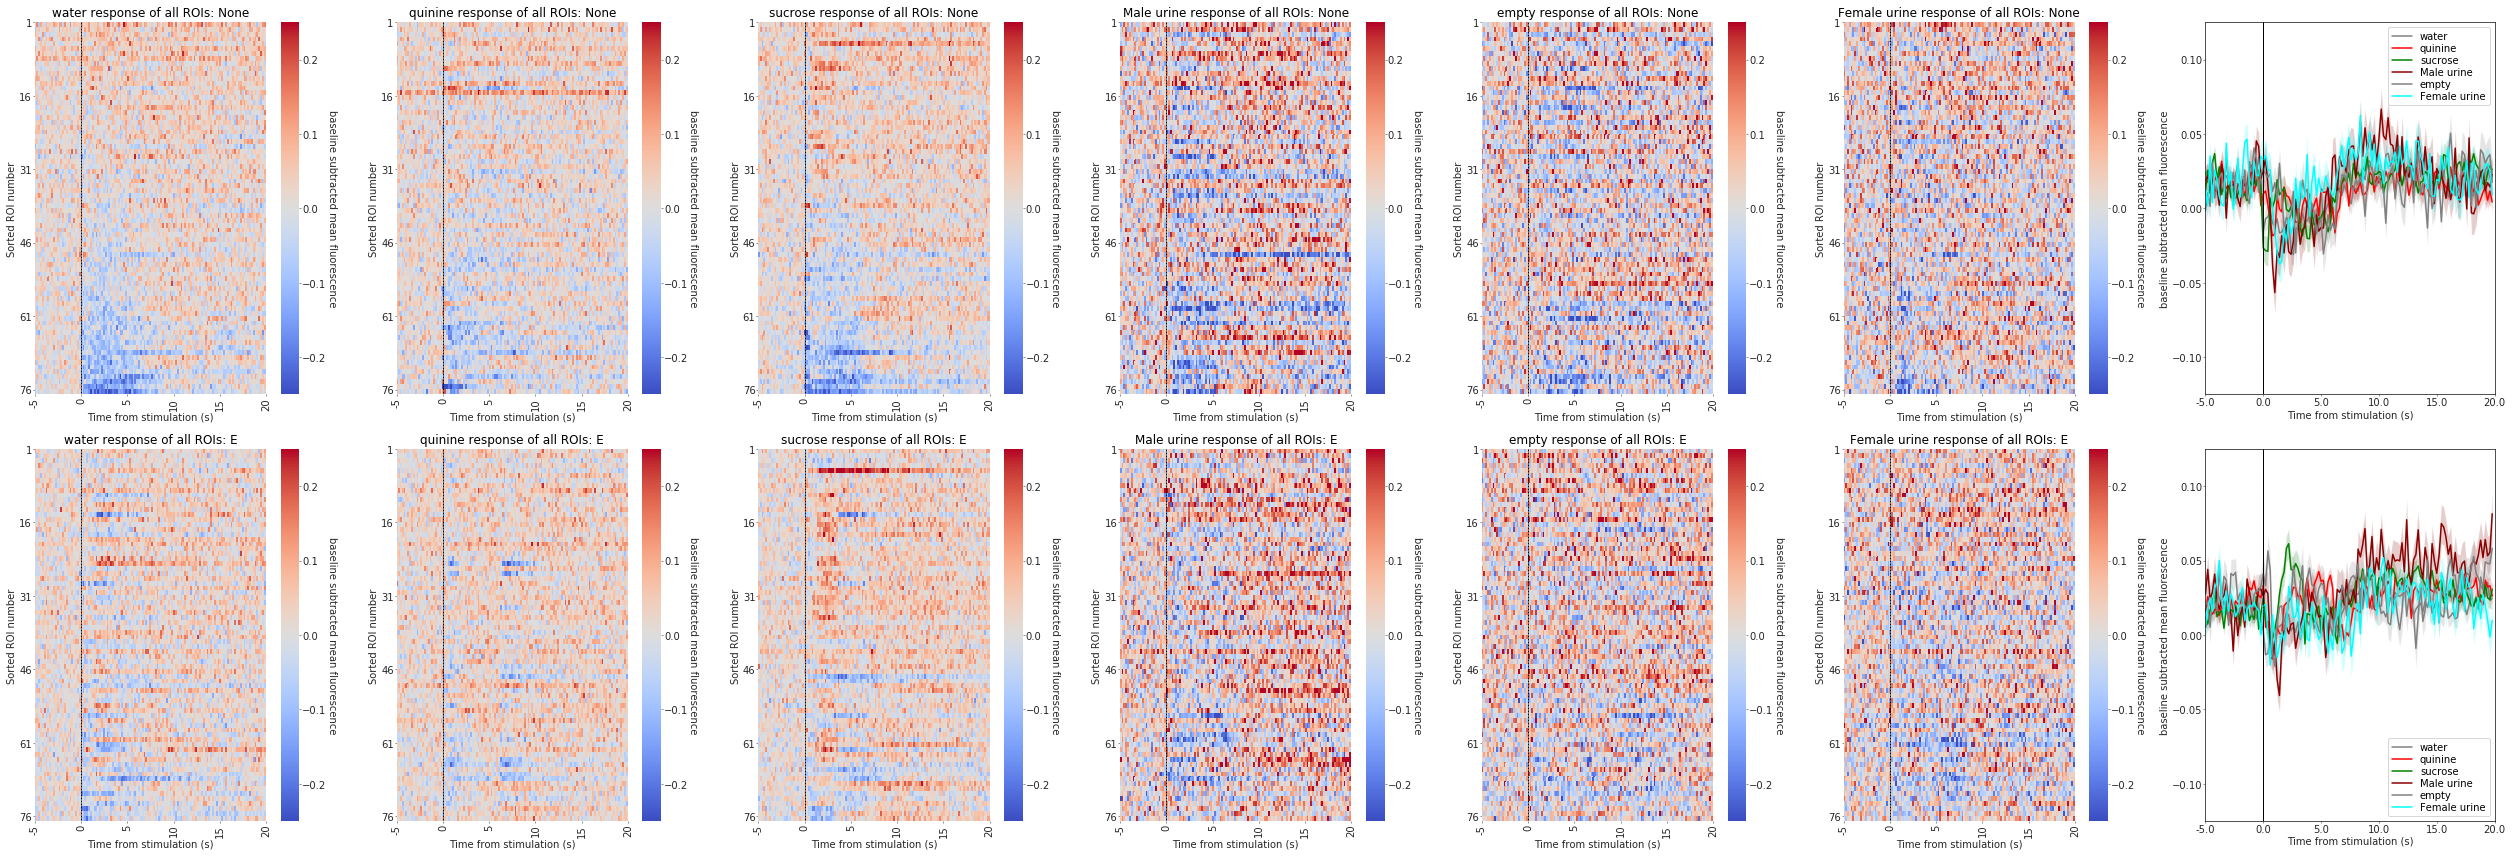

In [32]:
#plot the average signals for each roi 

if 'None' in keys_withtrials:
    keys_withtrials.remove('None')
    

cmin_for_key = np.nan*np.ones((len(keys_withtrials),2))
cmax_for_key = np.nan*np.ones((len(keys_withtrials),2))
temp=0

populationdata_for_key = {}
sortresponse_for_key = {}

for state in type_state:
    populationdata_for_key[state] = {}
    sortresponse_for_key[state] = {}


for k, key in enumerate(keys_withtrials):
    #print key
    #print before_frames
    for s,state in enumerate(type_state):
        tempdata = normalize_signal_3d(summary_result_dict[state][key][:,:,:],before_frames)
        populationdata = calculate_centraltendency_for_rois_KI(tempdata,
                                                        before_frames-1, centraltendency=centraltendency)
        populationdata_for_key[state][key] = populationdata
        cmin_for_key[k,s] = np.amin(populationdata)
        cmax_for_key[k,s] = np.amax(populationdata)
        if (key == sortby_key) & (state == sortby_key_state):
            # Sort by reward response
            if sortby==sortby:
                #collect the 2*before time period to calculate the response to stimuli
                tempresponse = np.mean(populationdata[:,before_frames:2*before_frames],
                                       axis=1)
            elif sortby=='':
                tempresponse = np.arange(0,numrois)
            sortresponse = np.argsort(tempresponse)[::-1]
#print np.argsort(np.percentile(signals, 5, axis=1))[::-1]
#print np.percentile(signals, 5, axis=1)[np.argsort(np.percentile(signals, 5, axis=1))[::-1]]




f, axs = plt.subplots(len(type_state),len(keys_withtrials)+1, figsize=(5*(len(keys_withtrials)+1),12))
for k, key in enumerate(keys_withtrials):
    for s, state in enumerate(type_state):

        print key, populationdata_for_key[state][key].shape
        cax = sns.heatmap(populationdata_for_key[state][key][sortresponse,:],
                    ax=axs[s,k],
                    cmap=plt.get_cmap('coolwarm'),
                    vmin=-cmax,
                    vmax=cmax,
                         rasterized=True)
        axs[s,k].grid(False)
        axs[s,k].set_title('%s response of all ROIs'%key + ": "+state)
        if sortby:
            axs[s,k].set_ylabel('Sorted ROI number')
        else:
            axs[s,k].set_ylabel('ROI number')
        axs[s,k].set_xlabel('Time from stimulation (s)')
        axs[s,k].set_xticks(range(0, (before_frames+after_frames+int(5*framerate)), int(5*framerate)))
        axs[s,k].set_xticklabels([str(((a-before_frames)/framerate)) for a in range(0, (before_frames+after_frames+int(5*framerate)), int(5*framerate))])
        axs[s,k].set_yticks(range(0, numrois, numrois/5))
        axs[s,k].set_yticklabels([str(a+1) for a in range(0, numrois, numrois/5)])
        axs[s,k].plot([before_frames, before_frames],
                    [0, numrois], '--k', linewidth=1)
    #     axs[k].plot([pre_window_size+before*1000*framerate*1E-3, pre_window_size+before*1000*framerate*1E-3],
    #                 [0, numrois], '--k', linewidth=1)

        cbar = cax.collections[0].colorbar
        #cbar.set_ticks([-0.2, 0, 0.2])
        #cbar.set_ticklabels(['-0.2', '0', '0.2'])
        cbar.set_label('%s fluorescence'%centraltendency, rotation='270', labelpad=10)#, fontsize='5', labelpad=10)

        sns.tsplot(populationdata_for_key[state][key], ax=axs[s,-1], color=colors_for_key[key], condition=key)

        axs[s,-1].set_xticks(range(0, (before_frames+after_frames+int(5*framerate)), int(5*framerate)))
        axs[s,-1].set_xticklabels([str(((a-before_frames+0.0)/framerate)) for a in range(0, (before_frames+after_frames+int(5*framerate)), int(5*framerate))])

        axs[s,-1].plot([before_frames, before_frames], 
                 [cmin-0.1, cmax+0.1],
                 '--k', linewidth=1)  
        # axs[-1].plot([pre_window_size+before_frames, pre_window_size+before_frames],
        #          [cmin-0.1, cmax+0.1],
        #          '--k', linewidth=1)
        axs[s,-1].set_xlabel('Time from stimulation (s)')
        axs[s,-1].set_ylabel('%s fluorescence'%centraltendency)
        axs[s,-1].set_ylim([0.5*cmin, 0.5*cmax])
        # axs[-1].set_ylim([-0.2, 0.4])
        #axs[-1].legend(loc='upper right')
f.tight_layout()

if neuropil=='nonneuropilcorrected':
    tempstr = 'populationresponse%s_%s%s'%(sortby,
                                           neuropil,
                                           analysis_condition)
else:
    if beta_neuropil != 'calculated':
        tempstr = 'populationresponse%s_%s_%s%d_%d_beta_%.1f'%(sortby, neuropil,
                                                               analysis_condition,
                                                               min_neuropil_radius,
                                                               neuropil_radius,
                                                               beta_neuropil)
    else:
        tempstr = 'populationresponse%s_%s%s_%d_%d_betacalculated'%(sortby,
                                                                    neuropil,
                                                                    analysis_condition,
                                                                    min_neuropil_radius,
                                                                    neuropil_radius)

# f.savefig(os.path.join(indir, 'results', tempstr+'.pdf'), format='pdf')
f.savefig(os.path.join(summarydir, 'sortby_' + "subset"+sortby_key+'_'+sortby_key_state+'_' +tempstr+'.png'), format='png', dpi=300)

# Summarize data for low/high estrogen

This code summarizes all the data. It is basically designed to plot 2 states.

## Define parameters for summary plots

In [1]:
#create a dictionary for colors
colors_for_key = {}

colors_for_key['sucrose'] = 'green'
colors_for_key['quinine'] = 'red'
colors_for_key['water'] = 'gray'
colors_for_key['Female urine'] = 'cyan'
colors_for_key['Male urine'] = 'darkred'
colors_for_key['empty'] = 'gray'
colors_for_key['None'] = ''
colors_for_key['Male urine 1/10'] = 'firebrick'
colors_for_key['Male urine 1/100'] = 'indianred'
colors_for_key['Male urine 1/1000'] = 'lightcoral'

In [2]:
#set values for the plots
cmin = -0.25
cmax = 0.25


In [4]:
#set the type of signals to use
signal = 'signal_norm'
#set how to sort the responses
sortby_key = 'sucrose'
sortby_key_state = 'ad lib'
#set how to sort and calculate response
sortby = 'reward response'
centraltendency='baseline subtracted mean'

In [6]:
# Define the time window of each trial
framerate = 5
before = 5 #in seconds
before_frames = int(before*framerate)
after = 20 
after_frames = int(after*framerate)

window_length = int((before + after)*framerate) #in frames

## Create result dictionary

Subset the files into the ones you will use to analyze

In [7]:
#subset the files
metainfo_subset = metainfo[(metainfo.State == 'ad lib')|(metainfo.State == 'Fast')][(metainfo.Condition == 'Diestrus')|\
    (metainfo.Condition == 'Proestrus')|(metainfo.Condition == 'Control')|(metainfo.Condition == 'E')]\
[metainfo.Session_type == 'sucrose_None']

NameError: name 'metainfo' is not defined

In [ ]:
filenames = metainfo_subset.filename.values
print filenames

In [ ]:
#set the conditions/states that the animals were kept in.
conditions = metainfo_subset.Condition.unique()
print 'Conditions are ' + conditions

In [ ]:
#create a dictionary which contains all data
summary_result_dict = {}
summary_result_dict[state1] = {}
summary_result_dict[state2] = {}


for filename in filenames:
    filepath = [f for f in os.listdir(resultdir) if filename in f][0]

    temp_result_dict = pd.read_pickle(os.path.join(resultdir,filepath))
    type_state = str(metainfo[metainfo.filename == filename].Condition.values[0])
    session_type = metainfo[metainfo.filename == filename].Session_type.values[0]
    plane = metainfo[metainfo.filename == filename].z_plane.values[0]

    for key in temp_result_dict['solenoid_align'].keys():
        print filename
        print key
        if (session_type == 'quinine_water') and (key == 'water'):
            print "processing duplicate"
            duplicate = True
        else:
            duplicate = False
        summary_result_dict = append_dict(summary_result_dict,temp_result_dict,key,type_state,signal= signal,duplicate = duplicate)



In [ ]:
#set the keys to plot.
keys_withtrials = summary_result_dict[type_state[0]].keys()
#if it is necessary manually rearrange the order of keys
#keys_withtrials = ['sucrose', 'quinine',  'Male urine','Female urine','water',  'empty']


In [ ]:
#plot the average signals for each roi
#its not clear why this code is necessary
type_state = summary_result_dict.keys()
numrois = summary_result_dict[type_state[0]][summary_result_dict[type_state[0]].keys()[0]].shape[1]
    
if 'None' in keys_withtrials:
    keys_withtrials.remove('None')
    
sortby = 'reward response'
centraltendency='baseline subtracted mean'

cmin_for_key = np.nan*np.ones((len(keys_withtrials),2))
cmax_for_key = np.nan*np.ones((len(keys_withtrials),2))
temp=0

populationdata_for_key = {}
sortresponse_for_key = {}

for state in type_state:
    populationdata_for_key[state] = {}
    sortresponse_for_key[state] = {}


for k, key in enumerate(keys_withtrials):
    print key
    print before_frames
    for s,state in enumerate(type_state):
        tempdata = normalize_signal_3d(summary_result_dict[state][key][:,:,:],before_frames)
        populationdata = calculate_centraltendency_for_rois_KI(tempdata,
                                                        before_frames-1, centraltendency=centraltendency)
        populationdata_for_key[state][key] = populationdata
        cmin_for_key[k,s] = np.amin(populationdata)
        cmax_for_key[k,s] = np.amax(populationdata)
        if (key == sortby_key) & (state == sortby_key_state):
            # Sort by reward response
            if sortby=='reward response':
                #collect the 2*before time period to calculate the response to stimuli
                tempresponse = np.mean(populationdata[:,before_frames:2*before_frames],
                                       axis=1)
            elif sortby=='':
                tempresponse = np.arange(0,numrois)
            sortresponse = np.argsort(tempresponse)[::-1]
#print np.argsort(np.percentile(signals, 5, axis=1))[::-1]
#print np.percentile(signals, 5, axis=1)[np.argsort(np.percentile(signals, 5, axis=1))[::-1]]


## Create plots

water (76L, 125L)
water (76L, 125L)
quinine (76L, 125L)
quinine (76L, 125L)
sucrose (76L, 125L)
sucrose (76L, 125L)
Male urine (76L, 125L)
Male urine (76L, 125L)
empty (76L, 125L)
empty (76L, 125L)
Female urine (76L, 125L)
Female urine (76L, 125L)


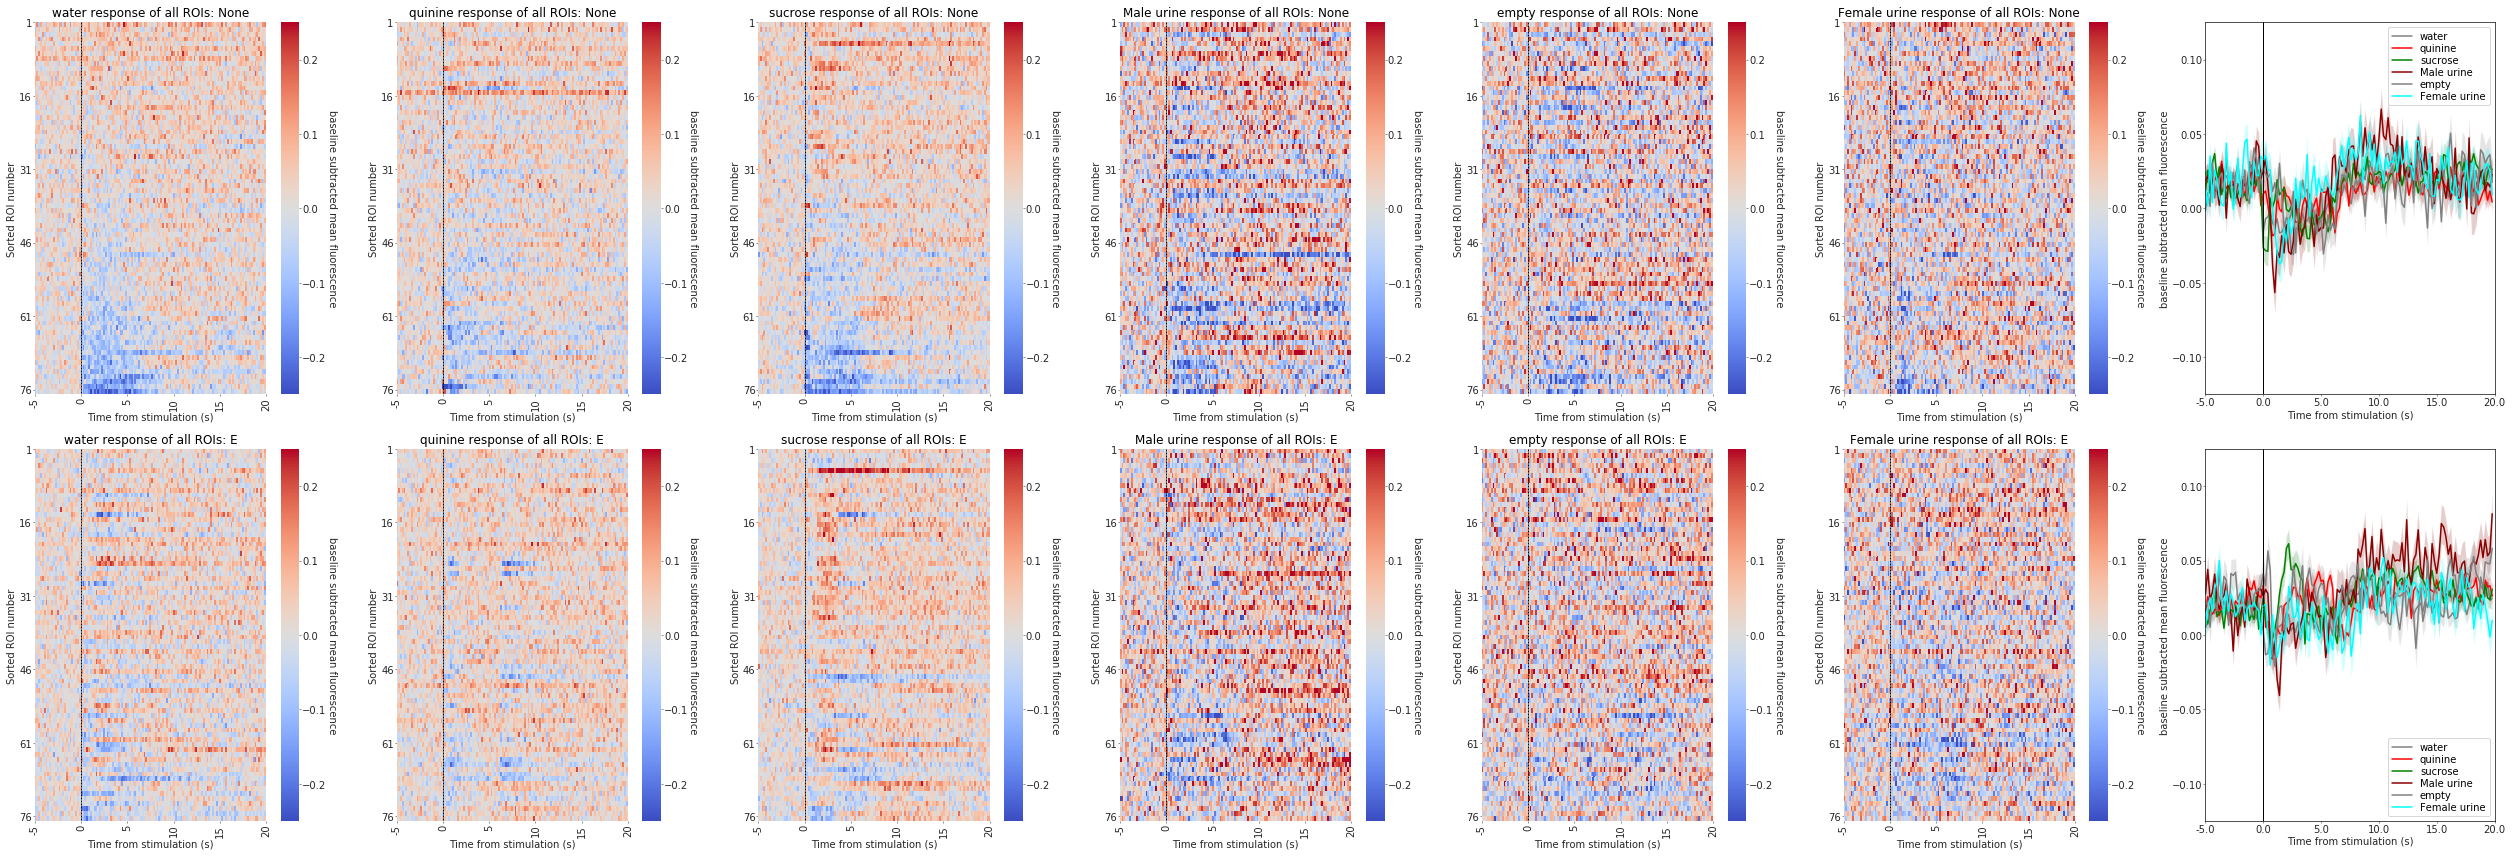

In [32]:
#plot the average signals for each roi 

if 'None' in keys_withtrials:
    keys_withtrials.remove('None')
    

cmin_for_key = np.nan*np.ones((len(keys_withtrials),2))
cmax_for_key = np.nan*np.ones((len(keys_withtrials),2))
temp=0

populationdata_for_key = {}
sortresponse_for_key = {}

for state in type_state:
    populationdata_for_key[state] = {}
    sortresponse_for_key[state] = {}


for k, key in enumerate(keys_withtrials):
    #print key
    #print before_frames
    for s,state in enumerate(type_state):
        tempdata = normalize_signal_3d(summary_result_dict[state][key][:,:,:],before_frames)
        populationdata = calculate_centraltendency_for_rois_KI(tempdata,
                                                        before_frames-1, centraltendency=centraltendency)
        populationdata_for_key[state][key] = populationdata
        cmin_for_key[k,s] = np.amin(populationdata)
        cmax_for_key[k,s] = np.amax(populationdata)
        if (key == sortby_key) & (state == sortby_key_state):
            # Sort by reward response
            if sortby==sortby:
                #collect the 2*before time period to calculate the response to stimuli
                tempresponse = np.mean(populationdata[:,before_frames:2*before_frames],
                                       axis=1)
            elif sortby=='':
                tempresponse = np.arange(0,numrois)
            sortresponse = np.argsort(tempresponse)[::-1]
#print np.argsort(np.percentile(signals, 5, axis=1))[::-1]
#print np.percentile(signals, 5, axis=1)[np.argsort(np.percentile(signals, 5, axis=1))[::-1]]




f, axs = plt.subplots(len(type_state),len(keys_withtrials)+1, figsize=(5*(len(keys_withtrials)+1),12))
for k, key in enumerate(keys_withtrials):
    for s, state in enumerate(type_state):

        print key, populationdata_for_key[state][key].shape
        cax = sns.heatmap(populationdata_for_key[state][key][sortresponse,:],
                    ax=axs[s,k],
                    cmap=plt.get_cmap('coolwarm'),
                    vmin=-cmax,
                    vmax=cmax,
                         rasterized=True)
        axs[s,k].grid(False)
        axs[s,k].set_title('%s response of all ROIs'%key + ": "+state)
        if sortby:
            axs[s,k].set_ylabel('Sorted ROI number')
        else:
            axs[s,k].set_ylabel('ROI number')
        axs[s,k].set_xlabel('Time from stimulation (s)')
        axs[s,k].set_xticks(range(0, (before_frames+after_frames+int(5*framerate)), int(5*framerate)))
        axs[s,k].set_xticklabels([str(((a-before_frames)/framerate)) for a in range(0, (before_frames+after_frames+int(5*framerate)), int(5*framerate))])
        axs[s,k].set_yticks(range(0, numrois, numrois/5))
        axs[s,k].set_yticklabels([str(a+1) for a in range(0, numrois, numrois/5)])
        axs[s,k].plot([before_frames, before_frames],
                    [0, numrois], '--k', linewidth=1)
    #     axs[k].plot([pre_window_size+before*1000*framerate*1E-3, pre_window_size+before*1000*framerate*1E-3],
    #                 [0, numrois], '--k', linewidth=1)

        cbar = cax.collections[0].colorbar
        #cbar.set_ticks([-0.2, 0, 0.2])
        #cbar.set_ticklabels(['-0.2', '0', '0.2'])
        cbar.set_label('%s fluorescence'%centraltendency, rotation='270', labelpad=10)#, fontsize='5', labelpad=10)

        sns.tsplot(populationdata_for_key[state][key], ax=axs[s,-1], color=colors_for_key[key], condition=key)

        axs[s,-1].set_xticks(range(0, (before_frames+after_frames+int(5*framerate)), int(5*framerate)))
        axs[s,-1].set_xticklabels([str(((a-before_frames+0.0)/framerate)) for a in range(0, (before_frames+after_frames+int(5*framerate)), int(5*framerate))])

        axs[s,-1].plot([before_frames, before_frames], 
                 [cmin-0.1, cmax+0.1],
                 '--k', linewidth=1)  
        # axs[-1].plot([pre_window_size+before_frames, pre_window_size+before_frames],
        #          [cmin-0.1, cmax+0.1],
        #          '--k', linewidth=1)
        axs[s,-1].set_xlabel('Time from stimulation (s)')
        axs[s,-1].set_ylabel('%s fluorescence'%centraltendency)
        axs[s,-1].set_ylim([0.5*cmin, 0.5*cmax])
        # axs[-1].set_ylim([-0.2, 0.4])
        #axs[-1].legend(loc='upper right')
f.tight_layout()

if neuropil=='nonneuropilcorrected':
    tempstr = 'populationresponse%s_%s%s'%(sortby,
                                           neuropil,
                                           analysis_condition)
else:
    if beta_neuropil != 'calculated':
        tempstr = 'populationresponse%s_%s_%s%d_%d_beta_%.1f'%(sortby, neuropil,
                                                               analysis_condition,
                                                               min_neuropil_radius,
                                                               neuropil_radius,
                                                               beta_neuropil)
    else:
        tempstr = 'populationresponse%s_%s%s_%d_%d_betacalculated'%(sortby,
                                                                    neuropil,
                                                                    analysis_condition,
                                                                    min_neuropil_radius,
                                                                    neuropil_radius)

# f.savefig(os.path.join(indir, 'results', tempstr+'.pdf'), format='pdf')
f.savefig(os.path.join(summarydir, 'sortby_' + "subset"+sortby_key+'_'+sortby_key_state+'_' +tempstr+'.png'), format='png', dpi=300)

# VJ analysis code (works), come back when necessary

In [540]:
num_background_rois = 0  #This is the number of ROIs just representing global background
# their signal can be used to subtract out the global fluctuations in noise over time

sima_or_suite2p = 'sima'
neuropil = 'nonneuropilcorrected' # 'nonneuropilcorrected' 'neuropil' 'neuropilcorrected'
suite2p_results_dir = '/home/stuberlab/Suite2P-master/Results'
normalization = 'medianscaling'  # mean or medianscaling or none
infer_spikes = False  #if true, perform OASIS deconvolution. If not, use raw fluorescence signal
plot_denoised_signals = False  #if true, only denoised signals are plotted. if not, inferred spikes are plotted
if infer_spikes:
    if plot_denoised_signals:
        signaltype = '_denoisedsignals'  #used to label names of results files
    else:
        signaltype = '_inferredspikes'  #used to label names of results files
else:
    signaltype = ''

if infer_spikes and sima_or_suite2p == 'suite2p':
    raise Exception('Suite 2p deconvolution not yet added here')
    
analysis_condition = ''#'_untilfirstquinine'# '_history' 
# If the above is 'history', only analyze trials split by history of previous liquid
# delivery. If it is empty string, analyze without regard to history


onlybehavior = False # If true, only analyze behavior
# indir = '/media/stuberlab/Vijay5/2p data/VJ_OFC_mThalinh_02/D23_sucrosequinine_rewardinh'


Analyzing KI_m120_d1_z360_1p3x
Pre window size = 10, window size = 60
['water', 'sucrose']
['water', 'sucrose']
Pre window size = 10, window size = 60
(30L, 60L, 43L)
25
(30L, 60L, 43L)
25
water (43L, 60L)
sucrose (43L, 60L)


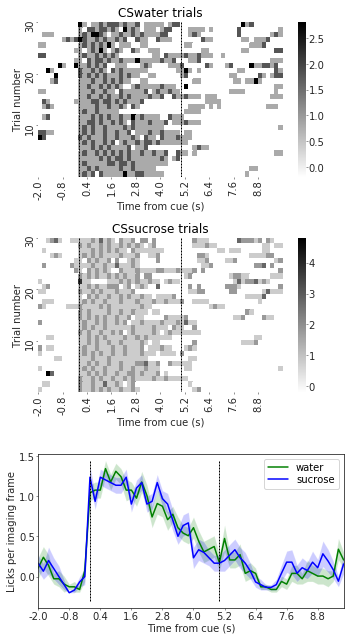

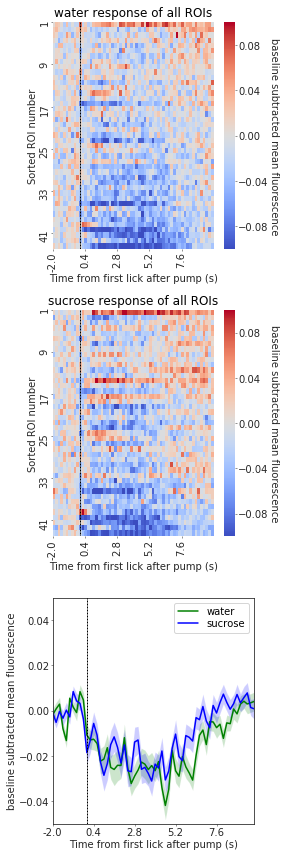

In [542]:
print('Analyzing %s'%filename)
tempfiles = os.walk(indir).next()[2]


cues = np.sort(np.concatenate((sol1_on, sol2_on)))
sol1flagfortrial = ismembertol(cues, sol1_on, tol=3)  # was a trial sucrose or not?

sol1flagforprevioustrial = np.insert(sol1flagfortrial[:-1], 0, np.nan)

'''
#use for removing lick artifact, not necessary for now
lickartifacts = ismembertol(lick_on, cues+r_fxd, 2) # added on November 7 2016
lick_on = lick_on[np.logical_not(lickartifacts)] # added on November 7 2016
lickartifacts = ismembertol(lick_on, cues+r_bgd, 2) # added on November 7 2016
licks = licks[np.logical_not(lickartifacts)] # added on November 7 2016
'''

if len(eventlog[eventlog[:,0]==9,1])>0:
    tempframes = eventlog[eventlog[:,0]==9,1]
    diff_frames = np.diff(tempframes)
    if np.amin(diff_frames) < np.median(diff_frames) - 5*stats.iqr(diff_frames):
        last_timestamp = eventlog[-1,1]  # assuming last timestamp is a good approximation for the end of the session
        tempframerate = (last_timestamp+0.0)/len(sequences)
        frames = np.array([a*tempframerate for a in range(len(sequences))])

# Decide if analysis should be locked to first lick or the liquid presentation.
# Optogenetic inhibition is locked to the liquid presentation.
# So better to use this for the opto experiments    

firstlick_after_fxdpump = firstlick_after_event(cues, lick_on)

#     firstlick_after_fxdpump = cues


framenumberforfirstlick_after_fxdpump = np.squeeze(framenumberforevent(firstlick_after_fxdpump,
                                                                         frames))

frame_of_next_firstlick = np.nan*np.ones(framenumberforfirstlick_after_fxdpump.shape)
frame_of_next_firstlick[:-1] = np.diff(framenumberforfirstlick_after_fxdpump)

tempsol1prevtrial = (sol1flagforprevioustrial==1)
tempsol2prevtrial = np.logical_not(sol1flagforprevioustrial)
# Do NOT count the first trial in analysis
tempsol1prevtrial[0] = False
tempsol2prevtrial[0] = False

trial_selector_dict = {}

if analysis_condition == '':
    trial_selector_dict[sol1_stim] = (sol1flagfortrial==1)
    trial_selector_dict[sol2_stim] = np.logical_not(sol1flagfortrial)
elif analysis_condition == '_history':
    trial_selector_dict[sol1_stim + 'prevtrial' +sol1_stim] = \
    np.logical_and((sol1flagfortrial==1),
                   (tempsol1prevtrial==1))
    trial_selector_dict[sol1_stim+'prevtrial'+sol2_stim] = \
    np.logical_and((sol1flagfortrial==1),
                   np.logical_not(tempsol1prevtrial))
    trial_selector_dict[sol2_stim+'prevtrial'+sol1_stim] = \
    np.logical_and(np.logical_not(sol1flagfortrial),
                   (tempsol1prevtrial==1))
    trial_selector_dict[sol2_stim + 'prevtrial' +sol2_stim] = \
    np.logical_and(np.logical_not(sol1flagfortrial),
                   np.logical_not(tempsol1prevtrial))
elif analysis_condition == '_untilfirstquinine':
    tempidx = np.where(sol1flagfortrial==0)[0][0]
    print('First sol2 on trial %d'%(tempidx))
    temp = np.nan*np.ones(sol1flagfortrial.shape)
    temp[:tempidx] = 1
    trial_selector_dict[sol1_stim] = (temp==1)
    temp = {}
    temp[sol1_stim] = np.array([])


else:
    raise Exception('analysis_condition not recognized')
#     print sol1flagfortrial
#     print trial_selector_dict['prevtrialsucrose']
#     print trial_selector_dict['prevtrialquinine']
#     raise Exception()


framenumberforfirstlick_after_fxdpump_dict = {}
frame_of_next_firstlick_dict = {}
trials_of_interest_dict = {}

for key in trial_selector_dict.keys():
    framenumberforfirstlick_after_fxdpump_dict[key] = framenumberforfirstlick_after_fxdpump[trial_selector_dict[key]]
    frame_of_next_firstlick_dict[key] = frame_of_next_firstlick[trial_selector_dict[key]]
    trials_of_interest_dict[key] = np.where(np.isfinite(framenumberforfirstlick_after_fxdpump_dict[key]))[0]
#     print(trials_of_interest_dict['quinineprevtrialquinine'],
#           trials_of_interest_dict['quinineprevtrialsucrose'])
#     raise Exception()


framenumberforlicks = np.squeeze(framenumberforevent(lick_on, frames))
numlicksperframe = calculate_num_licks_for_each_frame(framenumberforlicks, frames.shape[0])

lick_bout_onsets = calculate_lick_bout_onsets(lick_on)

baseline_period = 2E3 # in ms

_, licksalign_baselinesubtracted, pre_window_size, window_size= align_traces_around_events(numlicksperframe,
                                                                    framenumberforfirstlick_after_fxdpump_dict,
                                                                    frame_of_next_firstlick_dict,
                                                                    baseline_period, framerate)

# Select all trial types of interest for the session

keys_withtrials = [key for key in licksalign_baselinesubtracted.keys() if licksalign_baselinesubtracted[key].shape[0]>0]
print keys_withtrials

if not analysis_condition =='':
    if 'sucrose_laser' not in keys_withtrials:
        keys_withtrials.remove('sucrose_nolaser')
    elif 'sucrose_nolaser' not in keys_withtrials:
        keys_withtrials.remove('sucrose_laser')
    else:
        keys_withtrials.remove('sucrose')


    if 'quinine_laser' not in keys_withtrials:
        keys_withtrials.remove('quinine_nolaser') 
    elif 'quinine_nolaser' not in keys_withtrials:
        keys_withtrials.remove('quinine_laser')
    else:
        keys_withtrials.remove('quinine')
elif analysis_condition == '_history':
    for key in keys_withtrials:
        print trials_of_interest_dict[key].shape
        if trials_of_interest_dict[key].size==0:
            keys_withtrials.remove(key)

print keys_withtrials

colors_for_key = {}

colors_for_key['sucrose'] = 'b'
colors_for_key['quinine'] = 'r'
colors_for_key['water'] = 'g'


colors_for_key['sucroseprevtrialsucrose'] = [0, 0, 1]
colors_for_key['sucroseprevtrialquinine'] = [0.5, 0, 1]
colors_for_key['quinineprevtrialsucrose'] = [1, 0, 0.5]
colors_for_key['quinineprevtrialquinine'] = [1, 0, 0]

mkdir_p(os.path.join(indir, 'results'))
mkdir_p(os.path.join(indir, 'results', 'ROIs'))

sortbynumlicks = {}
for key in keys_withtrials:
    temp = licksalign_baselinesubtracted[key][trials_of_interest_dict[key]]
    tempsum = np.sum(temp[:,pre_window_size:pre_window_size+int(before*1000*framerate*1E-3)], axis=1)
    tempidx = np.argsort(tempsum)
    sortbynumlicks[key] = trials_of_interest_dict[key][tempidx]

plot_rasters_PSTH(None, keys_withtrials, licksalign_baselinesubtracted,
                  window_size, pre_window_size, before*1000, framerate,
                  trials_of_interest_dict,
                  colors_for_key, indir,
                  'Licks per imaging frame%s'%(analysis_condition),
                  os.path.join(indir, 'results'),numframesforcue = before_frames,
                  rasters=True, PSTH=True)



if onlybehavior:
    print "skip"

if sima_or_suite2p == 'sima':
#         h5files = [f for f in tempfiles if os.path.splitext(f)[1]=='.h5' and 'spatialweights' not in f]
#         if len(h5files) > 1:
#             raise Exception('Too many .h5 files found. Only keep the data file for this session')
#         h5file = h5files[0]

    #if not os.path.isfile(os.path.join(indir, 'neuropilsignals.npy')):
    #calculate_neuropil_signals(os.path.join(indir, h5file))

    min_neuropil_radius = 15
    neuropil_radius = 50
    beta_neuropil = 0.8 #'calculated'

    if neuropil == 'neuropilcorrected':
        if beta_neuropil != 'calculated':
            tempsignals = np.squeeze(np.load(os.path.join(indir,
                                                      '%s_neuropil_corrected_signals_%d_%d_beta_%.1f.npy'%(os.path.splitext(h5file)[0],
                                                                                                           min_neuropil_radius,
                                                                                                           neuropil_radius,
                                                                                                           beta_neuropil))))
        else:
            tempsignals = np.squeeze(np.load(os.path.join(indir,
                                                      '%s_neuropil_corrected_signals_%d_%d_betacalculated.npy'%(os.path.splitext(h5file)[0],
                                                                                                                min_neuropil_radius,
                                                                                                                neuropil_radius))))
    elif neuropil == 'nonneuropilcorrected':
        tempsignals = np.squeeze(np.load(os.path.join(indir, npyfile)))
    elif neuropil == 'neuropil':
        tempsignals = np.squeeze(np.load(os.path.join(indir,
                                                      '%s_neuropilsignals_%d_%d.npy'%(os.path.splitext(h5file)[0],
                                                                                      min_neuropil_radius,
                                                                                      neuropil_radius))))
#     print signals[:,193]
#     raise Exception()

    #if not os.path.isfile(os.path.join(indir, 'neuropilcoefficients.npy')):
    #    calculate_neuropil_coefficients(temp_signals, os.path.join(savedir, 'neuropilsignals.npy'))

    if num_background_rois > 0:
        global_background = np.mean(temp_signals[-num_background_rois:,:], axis=0)
        signals = temp_signals[:-num_background_rois,:] - global_background
        fig, ax = plt.subplots()
        ax.plot(global_background)
        ax.set_xticks(np.linspace(0, signals.shape[1], 10))
        ax.set_xticklabels([str(((a+0.0)/framerate)) for a in np.linspace(0, signals.shape[1], 10)])
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('F/F0')
        fig.savefig(os.path.join(indir, 'global_background.png'), format='png', dpi=300) 
    else:
        signals = tempsignals

    if infer_spikes:
        if not os.path.isfile(os.path.join(indir, '%s_inferredspikes.npy'%(os.path.splitext(h5file)[0]))) or True:
            inferredspikes = np.nan*np.ones(signals.shape)
            denoisedsignals = np.nan*np.ones(signals.shape)
            for roi in range(signals.shape[0]):
                inferredspikes[roi,:], denoisedsignals[roi,:] = deconvolve_OASIS(signals[roi,:])
                inferredspikes[roi,:] /= GetSn(signals[roi,:]) #Normalize spike count by neuronal noise
                # This provides a way to normalize inferred spikes so that they are comparable between
                # neurons.
            np.save(os.path.join(indir, '%s_inferredspikes.npy'%(os.path.splitext(h5file)[0])), inferredspikes)
            np.save(os.path.join(indir, '%s_denoisedsignals.npy'%(os.path.splitext(h5file)[0])), inferredspikes)

            if not plot_denoised_signals:
                signals = inferredspikes
            else:
                signals = denoisedsignals
        else:
            if not plot_denoised_signals:
                signals = np.load(os.path.join(indir, '%s_inferredspikes.npy'%(os.path.splitext(h5file)[0])))
            else:
                signals = np.load(os.path.join(indir, '%s_denoisedsignals.npy'%(os.path.splitext(h5file)[0])))

    if normalization == 'medianscaling':
        signalsmedian = np.nanmedian(signals, axis=1)
        signalsmin = np.nanmin(signals, axis=1)
        signalsmax = np.nanmax(signals, axis=1)
        signals = (signals-np.expand_dims(signalsmedian, axis=1))/np.expand_dims(signalsmax-signalsmin, axis=1)
        # Remove cases where max of signals is equal to min of signals. Especially if inferred spikes is zero
        # throughout for a cell on a session. This may be the case for some cells that are only active on
        # some days
        signals[np.where(signalsmax==signalsmin)[0],:] = signalsmax[np.where(signalsmax==signalsmin)][:,None]
    elif normalization == 'mean':
        signalsmean = np.nanmean(signals, axis=1)
        signals = signals/signalsmean[:,None]
        signals[np.where(signalsmean==0),:] = signalsmax[np.where(signalsmean==0)]
    elif normalization == 'none':
        pass
    else:
        raise Exception('Normalization not recognized!')

elif sima_or_suite2p == 'suite2p':
    temp2pfiles = os.walk(os.path.join(suite2p_results_dir, animalid, sessionid+'_raw')).next()[2]
    resultsfile = [f for f in temp2pfiles if '_proc' in f]
    if len(resultsfile) != 1:
        raise Exception('Check the _proc results file! Too few or too many of them!')

    dat = sio.loadmat(os.path.join(suite2p_results_dir, animalid, sessionid+'_raw', resultsfile[0]))['dat']
    tempnumrois = dat[0,0]['stat'].shape[1] #includes all ROIs, not just cells
    tempiscell = dat[0,0]['stat']['iscell'][0,:]
    iscell = np.nan*np.ones((tempnumrois,)) #tells you which ROIs are cells
    for i in range(tempnumrois):
        iscell[i] = tempiscell[i][0,0]
    iscell = iscell.astype(int)
    numrois = np.sum(iscell)
    print 'Total of %d cells among %d ROIs\n' %(numrois, tempnumrois)

    tempneuropilcoefficient = dat[0,0]['stat']['neuropilCoefficient'][0,:]
    neuropilcoefficient = np.nan*np.ones((tempnumrois,)) # This was calculated in Suite2p using ICA
    for i in range(tempnumrois):
        neuropilcoefficient[i] = tempneuropilcoefficient[i][0,0]

    tempsignalsraw = dat[0,0]['Fcell'][0,0]
    tempsignalsneuropil = dat[0,0]['FcellNeu'][0,0]
    tempsignalsneuropilcorrected = tempsignalsraw - np.expand_dims(neuropilcoefficient, axis=1)*tempsignalsneuropil

    """fig, axs = plt.subplots(2,2,figsize=(8,8))
    CDFplot(stats.skew(tempsignalsraw[iscell==1,:], axis=1), axs[0,0])
    CDFplot(stats.skew(tempsignalsneuropilcorrected[iscell==1,:], axis=1), axs[0,1])
    CDFplot(neuropilcoefficient, axs[1,0])
    raise Exception()"""
    if neuropil == 'neuropilcorrected':
        tempsignals = tempsignalsneuropilcorrected #Select which of the above to analyze
    elif neuropil == 'nonneuropilcorrected':
        tempsignals = tempsignalsraw
    elif neuropil == 'neuropil':
        tempsignals = tempsignalsneuropil
    signals = tempsignals[iscell==1,:]
    #sns.distplot(np.mean(signals, axis=1))

    #Normalize for all ROIs using Fnorm = (F-Fmedian)/(Fmax-Fmin)
    if normalization == 'medianscaling':
        signalsmedian = np.median(signals, axis=1)
        signalsmin = np.amin(signals, axis=1)
        signalsmax = np.amax(signals, axis=1)
        signals = (signals-np.expand_dims(signalsmedian, axis=1))/np.expand_dims(signalsmax-signalsmin, axis=1)
    elif normalization == 'mean':
        signals = signals/np.mean(signals, axis=1)[:,None]
    elif normalization == 'none':
        pass
    else:
        raise Exception('Normalization not recognized!')

    #sns.heatmap(signals[:,:1000])

    #plot_spatial_footprints_suite2p(dat)

# print signals.shape, signals[193,:]
# raise Exception()





# The next cell calculates the frame timestamps and stores them in the variable 'frames'. 
# There are multiple reasons why the frames input from MATLAB might not line up well with the actual
# number of frames collected. Each of these cases need to be handled below.


# 1. The frames input was absent. This happens when the frames wire was not connected.

# 2. If the number of frames set for collection in the 2P scope was not sufficient for the duration 
# of the behavioral session. In this case, the number of real frames will be lower than needed for the last cue.   

# 3. If there was no frame stop signal from the MATLAB computer to tell the 2P to stop frame collection.
# This happens when the physical frame stop wire was not appropriately connected. In this case, the number
# of frames is larger than the  number of MATLAB frames.



if len(eventlog[eventlog[:,0]==9,1])>0:
    tempframes = eventlog[eventlog[:,0]==9,1]
    diff_frames = np.diff(tempframes)
    if np.amin(diff_frames) < np.median(diff_frames) - 5*stats.iqr(diff_frames):
        last_timestamp = eventlog[-1,1]  # assuming last timestamp is a good approximation for the end of the session
        tempframerate = (last_timestamp+0.0)/signals.shape[1]
        frames = np.array([a*tempframerate for a in range(signals.shape[1])])
    else:
        tempframes = fix_any_dropped_frames(eventlog[eventlog[:,0]==9,1])
        frames = tempframes[::frameaveraging]
        if frames[-1]<cues[-1]+before*1000: # case 2 above
            print 'Case2'
            bgdpumps = bgdpumps[bgdpumps<=frames[-1]]
            cues = cues[cues<=frames[-1]]
            licks = licks[licks<=frames[-1]]
            cues = cues[cues<=frames[-1]]
            rewards = rewards[rewards<=frames[-1]]
            csminusflagfortrial = csminusflagfortrial[:cues.shape[0]]
            nlicksplus = nlicksplus[:cues.shape[0],:]
            nlicksminus = nlicksminus[:cues.shape[0],:]
        if len(frames)<signals.shape[1]:  # case 3 above
            print 'Case3'
            signals = signals[:, :len(frames)]
        if len(frames)>signals.shape[1]:
            print 'Case3'
            frames = frames[:signals.shape[1]]
else:  # frames input was absent (Case 1 above)
    last_timestamp = eventlog[-1,1]  # assuming last timestamp is a good approximation for the end of the session
    tempframerate = (last_timestamp+0.0)/signals.shape[1]
    frames = np.array([a*tempframerate for a in range(signals.shape[1])])


_, align_baselinesubtracted, _, _ = align_traces_around_events(signals.T,
                                                               framenumberforfirstlick_after_fxdpump_dict,
                                                               frame_of_next_firstlick_dict,
                                                               baseline_period, framerate)
#     align_baselinesubtracted = threshold_align_by_numtrials(align_baselinesubtracted)
# The above line is to ensure that only lags relative to cues that contain many valid trials
# (due to full-field optogenetic inhibition blankout) are counted

with open(os.path.join(indir,
                       'Alignedtotrial_%s%s%s.pickle'%(normalization,
                                                       signal_type,
                                                       analysis_condition)),
          'wb') as f:
    pickle.dump(align_baselinesubtracted, f)


numrois = signals.shape[0]


sortby = 'reward response'
centraltendency='baseline subtracted mean'

cmin_for_key = np.nan*np.ones((len(keys_withtrials),))
cmax_for_key = np.nan*np.ones((len(keys_withtrials),))
temp=0

populationdata_for_key = {}
for k, key in enumerate(keys_withtrials):
    #print key
    print align_baselinesubtracted[key][trials_of_interest_dict[key],:,:].shape
    print before_frames
    populationdata = calculate_centraltendency_for_rois(align_baselinesubtracted[key][trials_of_interest_dict[key],:,:],
                                                        before_frames-1, centraltendency=centraltendency)
    populationdata_for_key[key] = populationdata
    cmin_for_key[k] = np.amin(populationdata)
    cmax_for_key[k] = np.amax(populationdata)
    if k==0:
        # Sort by reward response
        if sortby=='reward response':
            tempresponse = np.mean(populationdata[:,pre_window_size+before_frames:pre_window_size+2*before_frames],
                                   axis=1)
        elif sortby=='':
            tempresponse = np.arange(0,numrois)
        sortresponse = np.argsort(tempresponse)[::-1]
#print np.argsort(np.percentile(signals, 5, axis=1))[::-1]
#print np.percentile(signals, 5, axis=1)[np.argsort(np.percentile(signals, 5, axis=1))[::-1]]


#raise Exception()
# cmin = np.amin(cmin_for_key)
# cmax = np.amax(cmax_for_key)

cmin = -0.1
cmax = 0.1

f, axs = plt.subplots(len(keys_withtrials)+1, figsize=(4,4*(len(keys_withtrials)+1)))
for k, key in enumerate(keys_withtrials):
    populationdata = \
    calculate_centraltendency_for_rois(align_baselinesubtracted[key][trials_of_interest_dict[key],:,:],
                                       before_frames-1, centraltendency=centraltendency)
    print key, populationdata.shape
    cax = sns.heatmap(populationdata[sortresponse,:],
                ax=axs[k],
                cmap=plt.get_cmap('coolwarm'),
                vmin=-cmax,
                vmax=cmax,
                     rasterized=True)
    axs[k].grid(False)
    axs[k].set_title('%s response of all ROIs'%key)
    if sortby:
        axs[k].set_ylabel('Sorted ROI number')
    else:
        axs[k].set_ylabel('ROI number')
    axs[k].set_xlabel('Time from first lick after pump (s)')
    axs[k].set_xticks(range(0, window_size, window_size/5))
    axs[k].set_xticklabels([str(((a-pre_window_size+0.0)/framerate)) for a in range(0, window_size, window_size/5)])
    axs[k].set_yticks(range(0, numrois, numrois/5))
    axs[k].set_yticklabels([str(a+1) for a in range(0, numrois, numrois/5)])
    axs[k].plot([pre_window_size, pre_window_size],
                [0, numrois], '--k', linewidth=1)
#     axs[k].plot([pre_window_size+before*1000*framerate*1E-3, pre_window_size+before*1000*framerate*1E-3],
#                 [0, numrois], '--k', linewidth=1)

    cbar = cax.collections[0].colorbar
    #cbar.set_ticks([-0.2, 0, 0.2])
    #cbar.set_ticklabels(['-0.2', '0', '0.2'])
    cbar.set_label('%s fluorescence'%centraltendency, rotation='270', labelpad=10)#, fontsize='5', labelpad=10)

    sns.tsplot(populationdata, ax=axs[-1], color=colors_for_key[key], condition=key)

axs[-1].set_xticks(range(0, window_size, window_size/5))
axs[-1].set_xticklabels([str(((a-pre_window_size+0.0)/framerate)) for a in range(0, window_size, window_size/5)])

axs[-1].plot([pre_window_size, pre_window_size], 
         [cmin-0.1, cmax+0.1],
         '--k', linewidth=1)  
# axs[-1].plot([pre_window_size+before_frames, pre_window_size+before_frames],
#          [cmin-0.1, cmax+0.1],
#          '--k', linewidth=1)
axs[-1].set_xlabel('Time from first lick after pump (s)')
axs[-1].set_ylabel('%s fluorescence'%centraltendency)
axs[-1].set_ylim([0.5*cmin, 0.5*cmax])
# axs[-1].set_ylim([-0.2, 0.4])
#axs[-1].legend(loc='upper right')
f.tight_layout()
if sortby:
    sortby = '_sortedby' + sortby

if neuropil=='nonneuropilcorrected':
    tempstr = 'populationresponse%s_%s%s'%(sortby,
                                           neuropil,
                                           analysis_condition)
else:
    if beta_neuropil != 'calculated':
        tempstr = 'populationresponse%s_%s_%s%d_%d_beta_%.1f'%(sortby, neuropil,
                                                               analysis_condition,
                                                               min_neuropil_radius,
                                                               neuropil_radius,
                                                               beta_neuropil)
    else:
        tempstr = 'populationresponse%s_%s%s_%d_%d_betacalculated'%(sortby,
                                                                    neuropil,
                                                                    analysis_condition,
                                                                    min_neuropil_radius,
                                                                    neuropil_radius)

# f.savefig(os.path.join(indir, 'results', tempstr+'.pdf'), format='pdf')
f.savefig(os.path.join(indir, 'results', tempstr+'.png'), format='png', dpi=300)
#     raise Exception()